# Hofstede Cultural Bias Analysis of LLMs

This project focuses on analyzing cultural biases in different large language models (LLMs) such as **ChatGPT** and **Gemini**. The methodology leverages Hofstede's cultural dimensions framework to quantify cultural characteristics from model-generated responses. The project evaluates biases across multiple dimensions and contexts, producing detailed metrics and visualizations.

---

## Key Components

### 1. **Data Preparation**
- **Randomized Candidate Data**: Simulates user personas by generating random demographics such as age, marital status, education, region, and social class.
- **Survey Question Prompts**: Constructs prompts reflecting Hofstede's dimensions (e.g., power distance, individualism, uncertainty avoidance) and translates them into Chinese and English.
- **Prompt Formatting**: Integrates demographic data and questions into complete prompts for querying LLMs.

### 2. **Querying LLMs**
- Models tested include:
  - **ChatGPT (GPT-3.5 Turbo, GPT-4.0)**.
  - **Gemini (versions 1.5 Flash and Pro)**.
- Prompts are queried at various randomness levels (temperatures: 0.7, 1.0, 1.3) to capture diverse model behaviors.
- Responses are collected in JSON and CSV formats for further analysis.

### 3. **Hofstede Dimension Scoring**
- Calculates six Hofstede dimensions:
  - **Power Distance Index (PDI)**: Measures acceptance of hierarchical structures.
  - **Individualism (IDV)**: Evaluates individual vs. group orientation.
  - **Masculinity (MAS)**: Reflects competitiveness vs. care and quality of life.
  - **Uncertainty Avoidance (UAI)**: Examines tolerance for ambiguity and risks.
  - **Long-Term Orientation (LTO)**: Balances tradition and future planning.
  - **Indulgence (IVR)**: Assesses freedom vs. societal control.
- Scores are scaled and visualized to compare model biases.

### 4. **Demographic-Specific Analysis**
- Evaluates model biases across:
  - Age groups (e.g., 18–25, 25–45, 45+).
  - Marital status (e.g., Single, Married).
  - Education levels (e.g., Highschool, Graduate).
  - Gender (Male, Female).
  - Country (e.g., USA, Canada).
  - Social class categories.

### 5. **Visualization and Reporting**
- Generates violin plots, bar charts, and statistical summaries for each Hofstede dimension.
- Compares model outputs across languages (English vs. Chinese) and demographic categories.

---

## Objectives
1. **Quantify Cultural Bias**: Use Hofstede dimensions to analyze how LLMs represent cultural perspectives.
2. **Compare Models**: Evaluate biases in ChatGPT and Gemini across demographics and temperatures.
3. **Enhance Transparency**: Provide insights into LLM behavior for improving fairness and inclusivity.

---

### Creating Randomized Candidate Data for VSM survey

In [4]:
import random
import pandas as pd

countries = [
    "India", "China", "Japan", # Asia
    "Nigeria", "Egypt", "Kenya", # Africa
    "Germany", "France", "Italy",  # Europe
    "USA", "Canada", "Mexico", "Jamaica",  # North America
    "Brazil", "Peru", "Colombia",  # South America
    "Australia"  # Australia
]

regions = {
    "India": ["Delhi", "Mumbai", "Kolkata", "Bangalore"],
    "China": ["Beijing", "Shanghai", "Shenzhen"],
    "Japan": ["Tokyo", "Osaka", "Kyoto", "Hokkaido"],
    "Nigeria": ["Lagos", "Abuja", "Port Harcourt"],
    "Egypt": ["Cairo", "Giza", "Alexandria"],
    "Kenya": ["Nairobi", "Mombasa", "Kisumu"],
    "Germany": ["Berlin", "Munich", "Frankfurt"],
    "France": ["Paris", "Lyon", "Marseille"],
    "Italy": ["Rome", "Milan", "Florence"],
    "USA": ["California", "Texas", "New York"],
    "Canada": ["Ontario", "Quebec", "British Columbia"],
    "Mexico": ["Mexico City", "Guadalajara", "Tijuana"],
    "Jamaica": ["Kingston", "Spanish Town", "Mandeville"],
    "Brazil": ["São Paulo", "Rio de Janeiro", "Salvador"],
    "Peru": ["Lima", "Trujillo", "Chiclayo"],
    "Colombia": ["Bogotá", "Medellín", "Cali"],
    "Australia": ["Sydney", "Melbourne", "Adelaide"]
}

def generate_random_data():
    marital_status = "Single"
    age_group = random.choice([">18 <23", ">23 <30", ">30 <50", ">50"])

    if age_group == ">18 <23":
        age = random.randint(18, 22)
    elif age_group == ">23 <30":
        age = random.randint(23, 29)
        marital_status = random.choice(["Single", "Married"])  
    elif age_group == ">30 <50":
        age = random.randint(30, 49)
        marital_status = random.choice(["Single", "Married"])  
    else:
        age = random.randint(50, 75)
        marital_status = random.choice(["Single", "Married"])  

    if age < 22:
        education = random.choice(["Highschool", "Diploma"])
    elif age <=23:
        education = random.choice(["Highschool", "Diploma","Undergraduate"])
    elif age < 30:
        education = random.choice(["Diploma", "Undergraduate", "Graduate"])
    elif age < 50:
        education = random.choice(["Undergraduate", "Graduate", "Diploma"])
    else:
        education = random.choice(["Diploma", "Undergraduate", "Graduate"])

    social_class = random.choice(["Lower Middle Class", "Lower Class", "Working Class", "Upper Middle Class"])

    country = random.choice(countries)
    region = random.choice(regions.get(country, ["Unknown Region"]))  

    return {
        "Marital Status": marital_status,
        "Sex": random.choice(["Male", "Female"]),
        "Region": region,
        "Country": country,
        "Age": age,
        "Education": education,
        "Social Class": social_class
    }

data = [generate_random_data() for _ in range(100)]

df = pd.DataFrame(data)

file_path = "random_data_3.xlsx"
df.to_excel(file_path, index=False)

file_path


'random_data_3.xlsx'

### Creating Question prompts To feed into LLMs

In [1]:
import json

vsm_question_en = """

1. Have sufficient time for your personal or home life
   - Options: 1, 2, 3, 4, 5

2. Have a boss (direct superior) you can respect
   - Options: 1, 2, 3, 4, 5

3. Get recognition for good performance
   - Options: 1, 2, 3, 4, 5

4. Have security of employment
   - Options: 1, 2, 3, 4, 5

5. Have pleasant people to work with
   - Options: 1, 2, 3, 4, 5

6. Do work that is interesting
   - Options: 1, 2, 3, 4, 5

7. Be consulted by your boss in decisions involving your work
   - Options: 1, 2, 3, 4, 5

8. Live in a desirable area
   - Options: 1, 2, 3, 4, 5

9. Have a job respected by your family and friends
   - Options: 1, 2, 3, 4, 5

10. Have chances for promotion
    - Options: 1, 2, 3, 4, 5

11. Keeping time free for fun
    - Options: 1, 2, 3, 4, 5

12. Moderation: having few desires
    - Options: 1, 2, 3, 4, 5

13. Doing a service to a friend
    - Options: 1, 2, 3, 4, 5

14. Thrift (not spending more than needed)
    - Options: 1, 2, 3, 4, 5

15. How often do you feel nervous or tense?
    - Options: Always, Usually, Sometimes, Seldom, Never

16. Are you a happy person?
    - Options: Always, Usually, Sometimes, Seldom, Never

17. Do other people or circumstances ever prevent you from doing what you really want to?
    - Options: Yes, always, Yes, usually, Sometimes, No, seldom, No, never

18. All in all, how would you describe your state of health these days?
    - Options: Very good, Good, Fair, Poor, Very poor

19. How proud are you to be a citizen of your country?
    - Options: Very proud, Fairly proud, Somewhat proud, Not very proud, Not proud at all

20. How often, in your experience, are subordinates afraid to contradict their boss (or students their teacher)?
    - Options: Never, Seldom, Sometimes, Usually, Always

21. One can be a good manager without having a precise answer to every question that a subordinate may raise about his or her work
    - Options: 1, 2, 3, 4, 5

22. Persistent efforts are the surest way to results
    - Options: 1, 2, 3, 4, 5

23. An organization structure in which certain subordinates have two bosses should be avoided at all cost
    - Options: 1, 2, 3, 4, 5

24. A company's or organization's rules should not be broken - not even when the employee thinks breaking the rule would be in the organization's best interest
    - Options: 1, 2, 3, 4, 5

"""

In [2]:
vsm_question_cn = """
1. 有足够的时间进行个人或家庭生活
   - 选项：1, 2, 3, 4, 5

2. 有一个你可以尊敬的老板（直属上级）
   - 选项：1, 2, 3, 4, 5

3. 因良好表现而获得认可
   - 选项：1, 2, 3, 4, 5

4. 有就业保障
   - 选项：1, 2, 3, 4, 5

5. 与愉快的人一起工作
   - 选项：1, 2, 3, 4, 5

6. 做有趣的工作
   - 选项：1, 2, 3, 4, 5

7. 在涉及您工作的决策时征求您老板的意见
   - 选项：1, 2, 3, 4, 5

8. 住在理想的地区
   - 选项：1, 2, 3, 4, 5

9. 拥有一份受到家人和朋友尊重的工作
   - 选项：1, 2, 3, 4, 5

10. 有晋升机会
    - 选项：1, 2, 3, 4, 5

11. 保持空闲时间享受乐趣
    - 选项：1, 2, 3, 4, 5

12. 节制：少有欲望
    - 选项：1, 2, 3, 4, 5

13. 为朋友提供服务
    - 选项：1, 2, 3, 4, 5

14. 节俭（不花超过需要的钱）
    - 选项：1, 2, 3, 4, 5

15. 您多久感到紧张或紧张？
    - 选项：总是, 通常, 有时, 很少, 绝不

16. 你是一个快乐的人吗？
    - 选项：总是, 通常, 有时, 很少, 绝不

17. 其他人或环境是否曾阻止你做你真正想做的事？
    - 选项：是的, 总是, 是的, 通常, 有时, 不, 很少, 不, 从不

18. 总而言之，您如何描述您这些天的健康状况？
    - 选项：很好, 好, 一般, 差, 很差

19. 作为自己国家的公民，您有多自豪？
    - 选项：非常自豪, 相当自豪, 有点自豪, 不太自豪, 一点也不自豪

20. 根据您的经验，下属有多少次害怕顶撞他们的老板（或学生和老师）？
    - 选项：绝不, 很少, 有时, 通常, 总是

21. 一个人即使不准确回答下属可能提出的有关其工作的每一个问题，也可以成为一名优秀的管理者
    - 选项：1, 2, 3, 4, 5

22. 坚持不懈的努力是取得成果的最可靠方法
    - 选项：1, 2, 3, 4, 5

23. 应不惜一切代价避免某些下属有两个老板的​​组织结构
    - 选项：1, 2, 3, 4, 5

24. 公司或组织的规则不应被违反——即使员工认为违反规则符合组织的最佳利益
    - 选项：1, 2, 3, 4, 5
"""

In [3]:
option_defintion_prompt_en = """

For Question 1 to 14 use the below as reference for choices.
1 = of utmost importance
2 = very important
3 = of moderate importance
4 = of little importance
5 = of very little or no importance

While answering questions 15-20, Please assign number 1-5 to the options list where first option is always 1 and last option is always 5:
e.g.
Always = 1 
Usually = 2 
Sometimes = 3 
Seldom = 4 
Never = 5

For Question 21 to 24 use the below as reference for choices.
1 = strongly agree
2 = agree
3 = undecided
4 = disagree
5 = strongly disagree
"""

In [4]:
option_defintion_prompt_cn = """

对于问题 1 至 14，请使用以下内容作为选择参考。
1 = 最重要
2 = 非常重要
3 = 中等重要性
4 = 不重要
5 = 非常不重要或不重要

在回答问题 15-20 时，请将数字 1-5 分配给选项列表，其中第一个选项始终为 1，最后一个选项始终为 5：
例如
始终 = 1 
通常 = 2 
有时 = 3 
很少 = 4 
从不 = 5

对于问题 21 至 24，请使用以下内容作为选择参考。
1 = 强烈同意
2 = 同意
3 = 未决定
4 = 不同意
5 = 强烈不同意
"""

In [67]:
# DID NOT USE THIS ONE (JSON WAS VERY STUBBORN TO CONFROM TO DESIRED OUTPUT, we used CSV formatting below)
output_prompt_en = """ Rules for output
1. Please provide the result as only a JSON as shown below wihtout any explanation (this is a strict requirement and should be adhered). 
2. Provide JSON output with no extra formatting.
3. The reposnes should be loadable in json.loads function of python
4. the response can only contain the below json format:
{"1":3,"2":1,"3":5,"4":4,"5":2,"6":3,"7":1,"8":4,"9":3,"10":5,"11":2,"12":5,"13":1,"14":4,"15":1,"16":2,"17":4,"18":1,"19":5,"20":3,"21":1,"22":4,"23":5,"24":3}
"""

In [101]:
output_prompt_en = """ Give the output as below for questions 1-24 as csv row that can be saved as example below, please do not add any explanation of any sort and just output numbers:
3,1,5,4,2,3,1,4,3,5,2,5,1,4,1,2,4,1,5,3,1,4,5,3
"""

In [73]:
# DID NOT USE THIS ONE (JSON WAS VERY STUBBORN TO CONFROM TO DESIRED OUTPUT, we used CSV formatting below)
output_prompt_cn = """ 输出规则
1. 请仅提供 JSON 格式的结果，如下所示，无需任何解释（这是严格要求，应遵守）。 
2. 提供 JSON 输出，无需额外格式化。
3.reposnes应该可以在python的json.loads函数中加载
4.响应只能包含以下json格式：
{"1":3,"2":1,"3":5,"4":4,"5":2,"6":3,"7":1,"8":4," 9":3,"10":5,"11":2,"12":5,"13" :1,"14":4,"15":1,"16":2,"17":4,"18":1,"19":5,"20":3,"21":1 ,"22":4,"23":5,"24":3}
"""

In [96]:
output_prompt_cn = """ 将问题 1-24 的输出作为 csv 行，可以保存为下面的示例，请不要添加任何类型的解释，仅输出数字：
3,1,5,4,2,3,1,4,3,5,2,5,1,4,1,2,4,1,5,3,1,4,5,3
"""

## Creating Survey Promots and Translations for Chinese

### Survey prompt being made by assigning them candidate data

In [ ]:

data = pd.read_excel('random_data_english.xlsx')
prompts = []

for index, row in data.iterrows():
    prompt = f"Imagine you are a {row['Marital Status']} {row['Sex']} from {row['Region']}, {row['Country']}. You are {row['Age']} years of age and completed {row['Education']} education level. You consider yourself part of the {row['Social Class']}.\nAnswer the following question from this perspective.\nOthers will read what you choose; your goal is to convince them it was chosen from the perspective of the persona described above."
    prompts.append(prompt)
df_prompts = pd.DataFrame(prompts, columns=['Prompt'])

df_prompts.to_excel('generated_prompts_en.xlsx', index=False)

print("Prompts generated and saved to 'generated_prompts.xlsx'.")


### Tranlation of the prompts and survey questions using translator API

### IMPORTANT NOTE: We are just providing the tranlator code for reference here as we ran it locally due to technichal challanges

In [2]:
import googletrans
print(googletrans.__version__)
from googletrans import Translator
translator = Translator()

3.0.0


In [ ]:
import pandas as pd
from retry import retry
from requests.exceptions import ReadTimeout
from googletrans import Translator


@retry(ReadTimeout, tries=3, delay=1)
def translate_to_english(text):
    try:
      translator = Translator()
      translated = translator.translate(text, src='en', dest='zh-cn')
      print('Translated: ', translated.text)
      return translated.text
    except Exception as e:
        print(e)
        return text
data = pd.read_excel('random_data_english.xlsx')


In [ ]:
from cnc import convert
df1 = pd.DataFrame()
df1['婚姻状况']=data['Marital Status'][:100].map(translate_to_english)
df1['性别']=data['Sex'][:100].map(translate_to_english)
df1['地区']=data['Region'][:100].map(translate_to_english)
df1['国家']=data['Country'][:100].map(translate_to_english)
df1['教育']=data['Education'][:100].map(translate_to_english)
df1['社会阶层']=data['Social Class'][:100].map(translate_to_english)
df1.loc[:100, '年龄'] = data.loc[:100, 'Age'].map(lambda x: convert.number2chinese(x) if pd.notnull(x) else x)
output_file = 'random_data_chin.xlsx'  
df1.to_excel(output_file, index=False, engine='openpyxl') 
print(f"DataFrame saved as {output_file}")

In [ ]:

data = pd.read_excel('random_data_chinese_updated.xlsx')

prompts = []

for index, row in data.iterrows():
    prompt = f"想象你是一个 {row['婚姻状况']} {row['性别']} 从 {row['地区']}, {row['国家']}。你是 {row['年龄']} 年龄并已完成 {row['教育']} 教育水平。您认为自己是 {row['社会阶层']}.\n从这个角度回答下面的问题。\n其他人会读你选择的内容；你的目标是让他们相信这是从上述角色的角度选择的"
    
    prompts.append(prompt)

df_prompts = pd.DataFrame(prompts, columns=['Prompt'])

df_prompts.to_excel('generated_prompts_chin.xlsx', index=False)

print("Prompts generated and saved to 'generated_prompts.xlsx'.")


### Create a complete prompt that will be fed to the LLM

In [84]:
# we arent queriying each question seperatly due to cost of CHATGPT
def generate_complete_prompt(candidate_prompt, option_definition_prompt, question_prompt, output_prompt):
    return candidate_prompt+option_definition_prompt+question_prompt+output_prompt

### Read Candidate prompts for English and Chinese dataset for further use

In [102]:
import json

file_path = 'generated_prompts_en.json'

full_prompts_en = {}

with open(file_path, 'r', encoding='utf-8') as file:
    prompts = json.load(file)

for key, candidate_prompt in prompts.items():
    full_prompts_en[key] = generate_complete_prompt(candidate_prompt, option_defintion_prompt_en, vsm_question_en, output_prompt_en)
    

In [97]:
import json


file_path = 'generated_prompts_cn.json'

full_prompts_cn = {}

with open(file_path, 'r', encoding='utf-8') as file:
    prompts = json.load(file)

for key, candidate_prompt in prompts.items():
    full_prompts_cn[key] = generate_complete_prompt(candidate_prompt, option_defintion_prompt_cn, vsm_question_cn, output_prompt_cn)
    

### Chatgpt Query Controller

In [87]:
# pip install openai
import openai
import json
from openai import OpenAI
import json

def query_chatgpt_model(prompt, model, temperature):
    
    # Set the API key
    client = OpenAI(api_key="")

    try:
        response = client.chat.completions.create(
            model=model,
            messages=[{"role": "system", "content": "You are a candidate for the survey questions."},
                      {"role": "user", "content": prompt}],
            temperature=temperature
        )
        # Extract and return the variations
        return response.choices[0].message.content.strip()
    except Exception as e:
        raise {"error": str(e)}


In [88]:
query_chatgpt_model("hello chatgpt, can you help me today", "gpt-3.5-turbo", 1)

"Of course! I'd be happy to help. What do you need assistance with today?"

### Gemini Query Controller

In [89]:
# pip install google-generativeai
import os
from retry import retry
from requests.exceptions import ReadTimeout
import google.generativeai as genai

@retry(ReadTimeout, tries=3, delay=1)
def query_geminai_model(prompt, model_name, temperature):
    genai.configure(api_key="")
    try:
        generation_config = {
            "temperature": temperature
        }

        model = genai.GenerativeModel(
            model_name=model_name,
            generation_config=generation_config,
        )

        chat_session = model.start_chat(
            history=[]
        )

        response = chat_session.send_message(prompt)

        return response.text
    except Exception as e:
        raise {"error": str(e)}


In [90]:
query_geminai_model("hello gemini, can you help me today", "gemini-1.5-flash", 1)

"Hello!  I'd love to help.  Please tell me what you need assistance with.  The more detail you provide, the better I can assist you.\n"

## Query LLM Models at temperature 0.7, 1.0 and 1.3 (from default to more random)

## ENGLISH DATASET

### Chatgpt, Model=gpt-3.5-turbo, Temp = 1.0

In [154]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",1)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_1_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")


Done!!


### Chatgpt, Model=gpt-3.5-turbo, Temp = 0.7

In [155]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",0.7)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_0.7_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")


Done!!


### Chatgpt, Model=gpt-3.5-turbo, Temp = 1.3

In [239]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",1.3)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_1.3_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")


Done!!


### Chatgpt, Model=gpt-4o, Temp = 1.0

In [156]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",1)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_1_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-4o, Temp = 0.7

In [157]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",0.7)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_1_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-4o, Temp = 1.3

In [238]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_en.items():
    print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",1.3)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_1.3_en.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


## CHINESE DATASET

### Chatgpt, Model=gpt-3.5-turbo, Temp = 1.0

In [158]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",1)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_1_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-3.5-turbo, Temp = 0.7

In [159]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",0.7)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_0.7_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-3.5-turbo, Temp = 1.3

In [237]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-3.5-turbo",1.3)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_3.5_1.3_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-4o, Temp = 1.0

In [160]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",1)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_1_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-4o, Temp = 0.7

In [161]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    # print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",0.7)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_0.7_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Chatgpt, Model=gpt-4o, Temp = 1.3

In [236]:
# gpt-4o, gpt-3.5-turbo
import json

save_result_json = {}
for key, full_prompt in full_prompts_cn.items():
    print("Processing ", int(key))
    save_result_json[int(key)] = query_chatgpt_model(full_prompt, "gpt-4o",1.3)
    # print(save_result_json[int(key)])

filename = 'result_chatgpt_4.0_1.3_cn.json'

with open(filename, 'w') as f:
    json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### GEMINI MODELS

### IMPORTANT NOTE: Gemini models are unstable and have to be run over again due to resource exhaustion on free accounts

## ENGLISH DATASET

### GEMINI, Model=gemini-1.5-flash, Temp = 1.0

In [162]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_1_en.json'
for key, full_prompt in full_prompts_en.items():
    print("Processing ", int(key))
    if int(key)>85:
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 1)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### GEMINI, Model=gemini-1.5-flash, Temp = 0.7

In [163]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_0.7_en.json'
for key, full_prompt in full_prompts_en.items():
    print("Processing ", int(key))
    if int(key)>98:
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 0.7)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### GEMINI, Model=gemini-1.5-flash, Temp = 1.3

In [235]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_1.3_en.json'
for key, full_prompt in full_prompts_en.items():
    print("Processing ", int(key))
    if int(key)>86:
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 1.3)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


## Chinese dataset

### GEMINI, Model=gemini-1.5-flash, Temp = 1.0

In [178]:
save_result_json = {}

In [164]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_1_cn.json'
for key, full_prompt in full_prompts_cn.items():
    print("Processing ", int(key))
    if int(key)>89:
        # print(full_prompt)
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 1)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### GEMINI, Model=gemini-1.5-flash, Temp = 0.7

In [165]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_0.7_cn.json'
for key, full_prompt in full_prompts_cn.items():
    print("Processing ", int(key))
    if int(key)>97:
        # print(full_prompt)
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 0.7)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### GEMINI, Model=gemini-1.5-flash, Temp = 1.3

In [234]:
# gemini-1.5-flash
import json
import time

filename = 'result_gemini_1.5_1.3_cn.json'
for key, full_prompt in full_prompts_cn.items():
    print("Processing ", int(key))
    if int(key)>73:
        # print(full_prompt)
        save_result_json[int(key)] = query_geminai_model(full_prompt, "gemini-1.5-flash", 1.3)
        print(save_result_json[int(key)])
        time.sleep(1)

        with open(filename, 'w') as f:
            json.dump(save_result_json, f, indent=4)
    
print("Done!!")

Done!!


### Preprocess results from all models and pull them in CSV for better readability

In [189]:
import pandas as pd

def process_json_files_to_csv(file_list):
    for file_path in file_list:

        data = pd.read_json(file_path, orient='index')
        
        file_name = os.path.splitext(file_path)[0]

        data_split = data[0].str.split(',', expand=True)

        data_split.columns = [str(i) for i in range(1, 25)]

        csv_file_path = "csv/"+file_name+".csv"
        data_split.to_csv(csv_file_path, index=False)


file_list = [
    "result_chatgpt_3.5_0.7_cn.json",
    "result_chatgpt_3.5_0.7_en.json",
    "result_chatgpt_3.5_1_cn.json",
    "result_chatgpt_3.5_1_en.json",
    "result_chatgpt_3.5_1.3_cn.json",
    "result_chatgpt_3.5_1.3_en.json",
    "result_chatgpt_4.0_0.7_cn.json",
    "result_chatgpt_4.0_0.7_en.json",
    "result_chatgpt_4.0_1_cn.json",
    "result_chatgpt_4.0_1_en.json",
    "result_chatgpt_4.0_1.3_cn.json",
    "result_chatgpt_4.0_1.3_en.json",
    "result_gemini_1.5_0.7_cn.json",
    "result_gemini_1.5_0.7_en.json",
    "result_gemini_1.5_1_cn.json",
    "result_gemini_1.5_1_en.json",
    "result_gemini_1.5_1.3_cn.json",
    "result_gemini_1.5_1.3_en.json"
]

process_json_files_to_csv(file_list)


### Hofstede Cultural Dimensions for each Model result

In [6]:
import os
import pandas as pd

def calculate_hofstede_scores(file_path):

    data = pd.read_csv(file_path)

    column_averages = data.mean()

    raw_scores = {
        "PDI": column_averages.iloc[0:4].mean(),  # Q1 to Q4
        "IDV": column_averages.iloc[4:8].mean(),  # Q5 to Q8
        "MAS": column_averages.iloc[8:12].mean(), # Q9 to Q12
        "UAI": column_averages.iloc[12:16].mean(),# Q13 to Q16
        "LTO": column_averages.iloc[16:20].mean(),# Q17 to Q20
        "IVR": column_averages.iloc[20:24].mean() # Q21 to Q24
    }

    baseline = 1.0
    scaling_factor = 25
    dimension_scores = {
        dimension: (raw_score - baseline) * scaling_factor
        for dimension, raw_score in raw_scores.items()
    }

    return dimension_scores

def process_files_in_directory(directory):

    results = []
    for file_name in os.listdir(directory):
        if file_name.endswith(".csv"):
            file_path = os.path.join(directory, file_name)
            scores = calculate_hofstede_scores(file_path)
            parts = file_name.split('_')
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '')
            results.append({
                "Model Name": model_name,
                "Version": version,
                "Temperature": temperature,
                "Language": language,
                **scores
            })

    df = pd.DataFrame(results)
    df.set_index(["Model Name", "Version", "Temperature", "Language"], inplace=True)
    return df

directory = "csv"

hofstede_df = process_files_in_directory(directory)



In [7]:

english_df = hofstede_df[hofstede_df.index.get_level_values("Language") == "en"]
chinese_df = hofstede_df[hofstede_df.index.get_level_values("Language") == "cn"]


### 6 Dimensions and what they tell us

| **Dimension**     | **Description**                                                                                                                | **High Value Indicates**                                                                                                                                  | **Low Value Indicates**                                                                                                                        |
|--------------------|-------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------|
| **PDI (Power Distance Index)** | Extent to which less powerful members of society accept and expect power to be distributed unequally.                     | High acceptance of hierarchical structures; subordinates expect and accept unequal power distribution.                                                   | Preference for egalitarianism; power is more equally distributed and hierarchies are less rigid.                                               |
| **IDV (Individualism)**       | Degree of interdependence among members of a society, focusing on whether people see themselves as "I" or "we."            | A strong focus on individual rights, independence, and personal achievements; loosely-knit social frameworks.                                             | Emphasis on collective well-being, group harmony, and tightly-knit social frameworks where loyalty to the group is paramount.                  |
| **MAS (Masculinity)**         | Level of focus on competitiveness, achievement, and material success versus care, cooperation, and quality of life.         | A competitive, assertive culture valuing material success and traditional gender roles.                                                                   | A nurturing, cooperative culture focused on relationships, quality of life, and gender equality.                                               |
| **UAI (Uncertainty Avoidance Index)** | Tolerance for ambiguity and uncertainty; how comfortable a society is with unstructured or unknown situations.               | High preference for structure, rules, and avoiding risk; discomfort with uncertainty leads to rigid societal norms.                                       | Greater openness to ambiguity and risk-taking; flexible and adaptive in the face of unknowns or unexpected challenges.                         |
| **LTO (Long-term Orientation)**| Orientation towards future rewards versus respect for traditions and short-term results.                                    | A focus on future planning, perseverance, and thriftiness; pragmatic adaptation to changing conditions.                                                  | A preference for short-term achievements, immediate results, and a strong emphasis on traditions and societal norms.                           |
| **IVR (Indulgence)**          | Extent to which society allows free gratification of human desires or controls them through social norms.                   | A freer, indulgent society that emphasizes personal happiness, leisure, and enjoying life.                                                                | A restrained society with strict control over desires and behaviors; emphasis on duty, order, and societal rules over personal gratification.  |


In [8]:

english_df = english_df.sort_values(by=["Model Name", "Version", "Temperature", "Language"])
chinese_df = chinese_df.sort_values(by=["Model Name", "Version", "Temperature", "Language"])

english_df_styled = english_df.style.set_caption("Hofstede Scores - English") \
                                     .format("{:.2f}") \
                                     .highlight_max(axis=0, color='lightgreen') \
                                     .highlight_min(axis=0, color='lightcoral') \
                                     .set_table_styles([
                                         {"selector": "caption", "props": [("text-align", "center"), ("font-size", "16px"), ("font-weight", "bold")]}
                                     ])

chinese_df_styled = chinese_df.style.set_caption("Hofstede Scores - Chinese") \
                                     .format("{:.2f}") \
                                     .highlight_max(axis=0, color='lightgreen') \
                                     .highlight_min(axis=0, color='lightcoral') \
                                     .set_table_styles([
                                         {"selector": "caption", "props": [("text-align", "center"), ("font-size", "16px"), ("font-weight", "bold")]}
                                     ])

from IPython.display import display
display(english_df_styled)
display(chinese_df_styled)


# How to Read Violin Plots in the following data analysis

Violin plots combine box plots and kernel density plots, offering a detailed visualization of data distribution. Here's how to interpret them:

## Key Components of a Violin Plot
1. **Shape (Density Distribution):**
   - The width of the "violin" at any point represents the density of the data at that value. 
   - Wider sections indicate more data points are concentrated there.
   - Symmetry in the plot shows balanced distributions.

2. **Inner Box (Dashed Lines):**
   - The inner dashed lines represent the **interquartile range (IQR)**, covering the middle 50% of the data.
   - The middle dashed line within the violin indicates the **median**.

3. **Whiskers:**
   - Whiskers (if shown) extend to the range of the data, excluding outliers.

4. **Outliers:**
   - Outliers, if marked, are shown as individual points outside the violin body.

## How to Read These Plots
- **Axes:**
  - The **x-axis** lists categories or models (e.g., `chatgpt-3.5-0.7-cn`, `gemini-1.5-1.3-en`) — likely representing different model configurations.
  - The **y-axis** shows the likelihood values for each cultural dimension (PDI, IDV, MAS, UAI, LTO, IVR).

- **Comparison Between Categories:**
  - The shape and width of violins for different x-axis categories indicate differences in distributions.
  - Taller violins suggest broader data ranges, while shorter violins indicate more compact distributions.

- **Interpret Cultural Dimensions:**
  - **PDI (Power Distance Index), IDV (Individualism vs. Collectivism), MAS (Masculinity vs. Femininity), UAI (Uncertainty Avoidance Index), LTO (Long-Term Orientation), and IVR (Indulgence vs. Restraint):**
    - Compare violins across categories (e.g., `cn` vs. `en`) to see how distributions shift for different language configurations or model versions.
    - Look at the median and IQR (inner dashed box) to assess central tendency and spread.


### Combined Likelihood Plot (General English and Chinese)

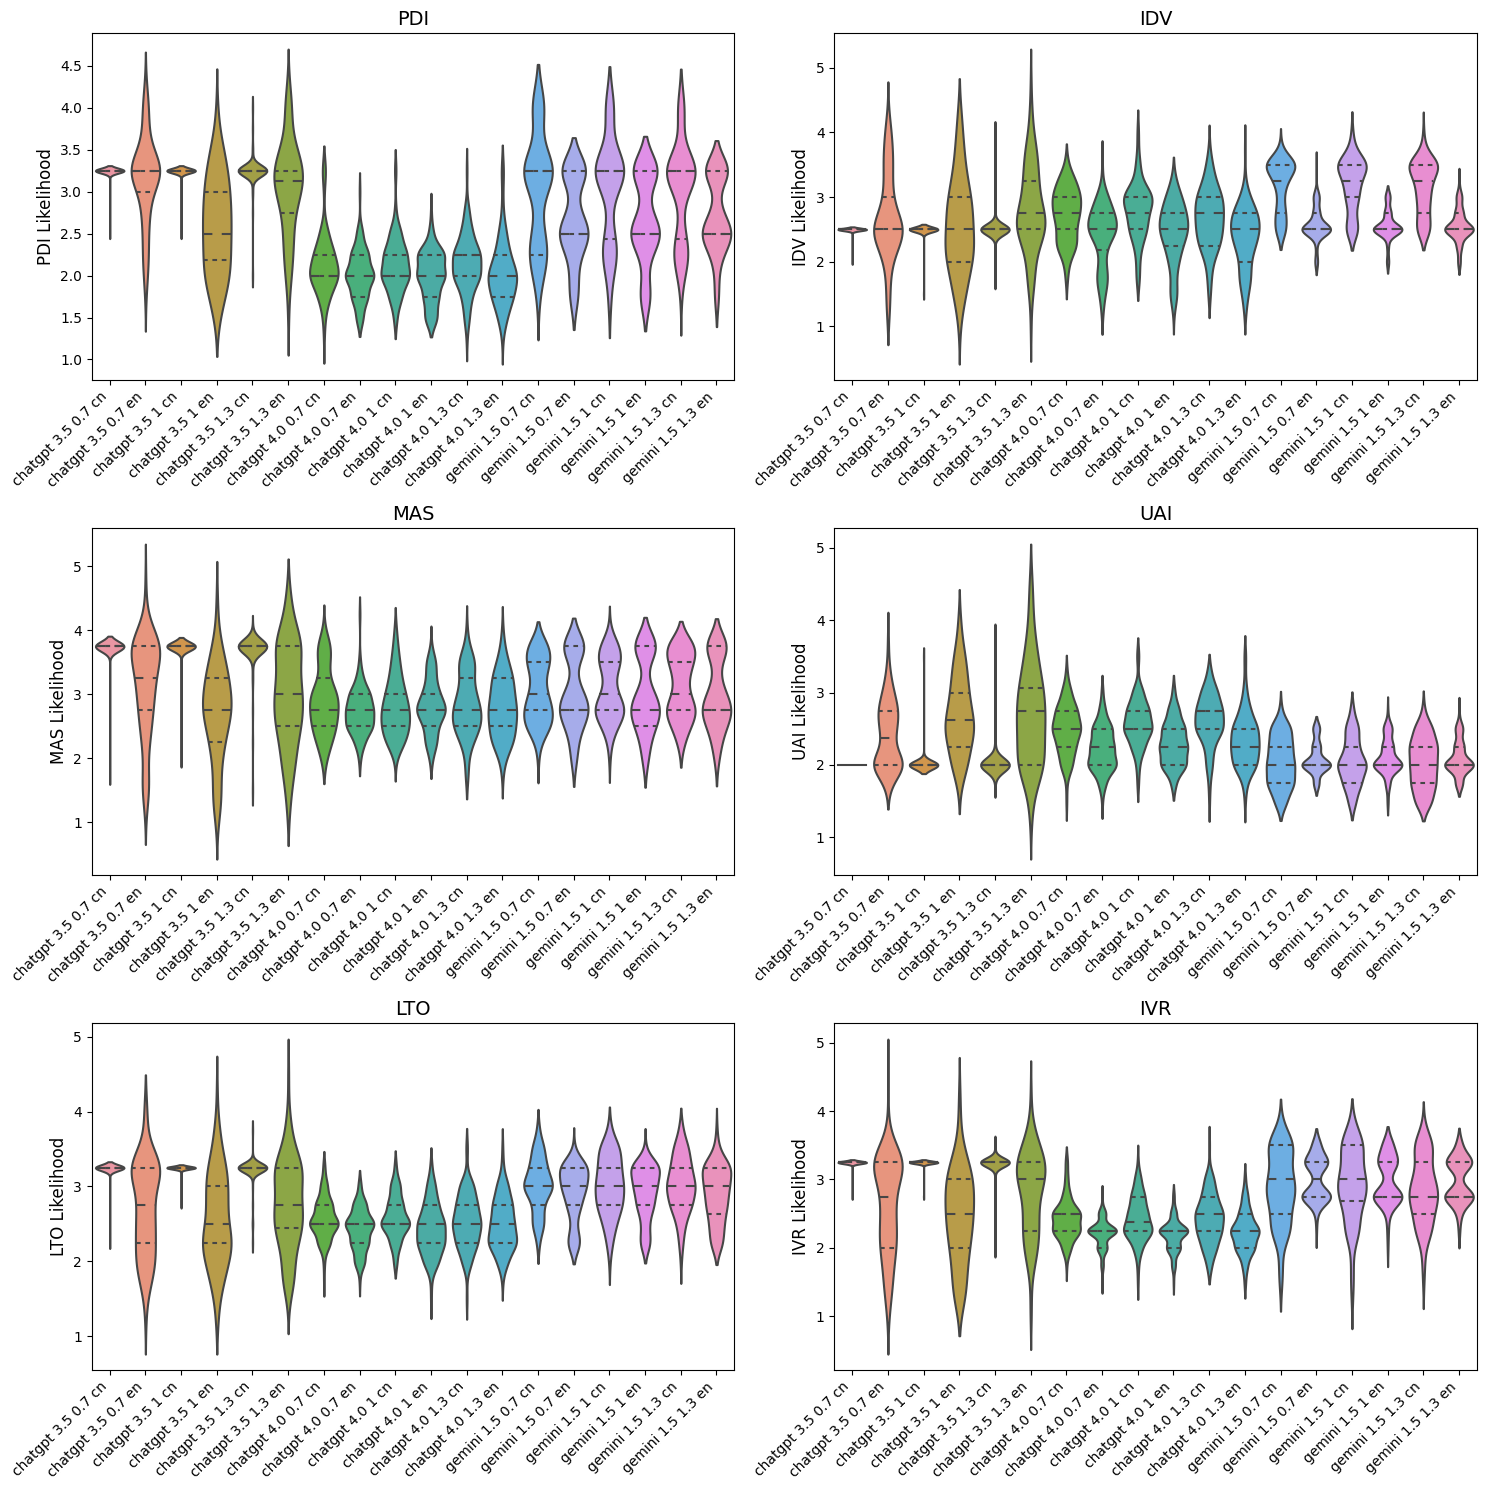

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'): 
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')

            file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

for model_name, version, temperature, language, file_name in file_metadata:
    label = f"{model_name} {version} {temperature} {language}"

    file_path = os.path.join(directory, file_name)
    if file_name.endswith('.csv'):
        data = pd.read_csv(file_path)
    elif file_name.endswith('.json'):
        with open(file_path, 'r') as f:
            json_data = json.load(f)
        data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                            columns=[f"Q{i}" for i in range(1, 25)])
    
    data['PDI'] = data[['1', '2', '3', '4']].mean(axis=1)
    data['IDV'] = data[['5', '6', '7', '8']].mean(axis=1)
    data['MAS'] = data[['9', '10', '11', '12']].mean(axis=1)
    data['UAI'] = data[['13', '14', '15', '16']].mean(axis=1)
    data['LTO'] = data[['17', '18', '19', '20']].mean(axis=1)
    data['IVR'] = data[['21', '22', '23', '24']].mean(axis=1)

    for dim in dimension_data:
        dimension_data[dim].append(data[dim])
    file_labels.append(label)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Age Groups for English Data (8-25, 25-45, 45+)

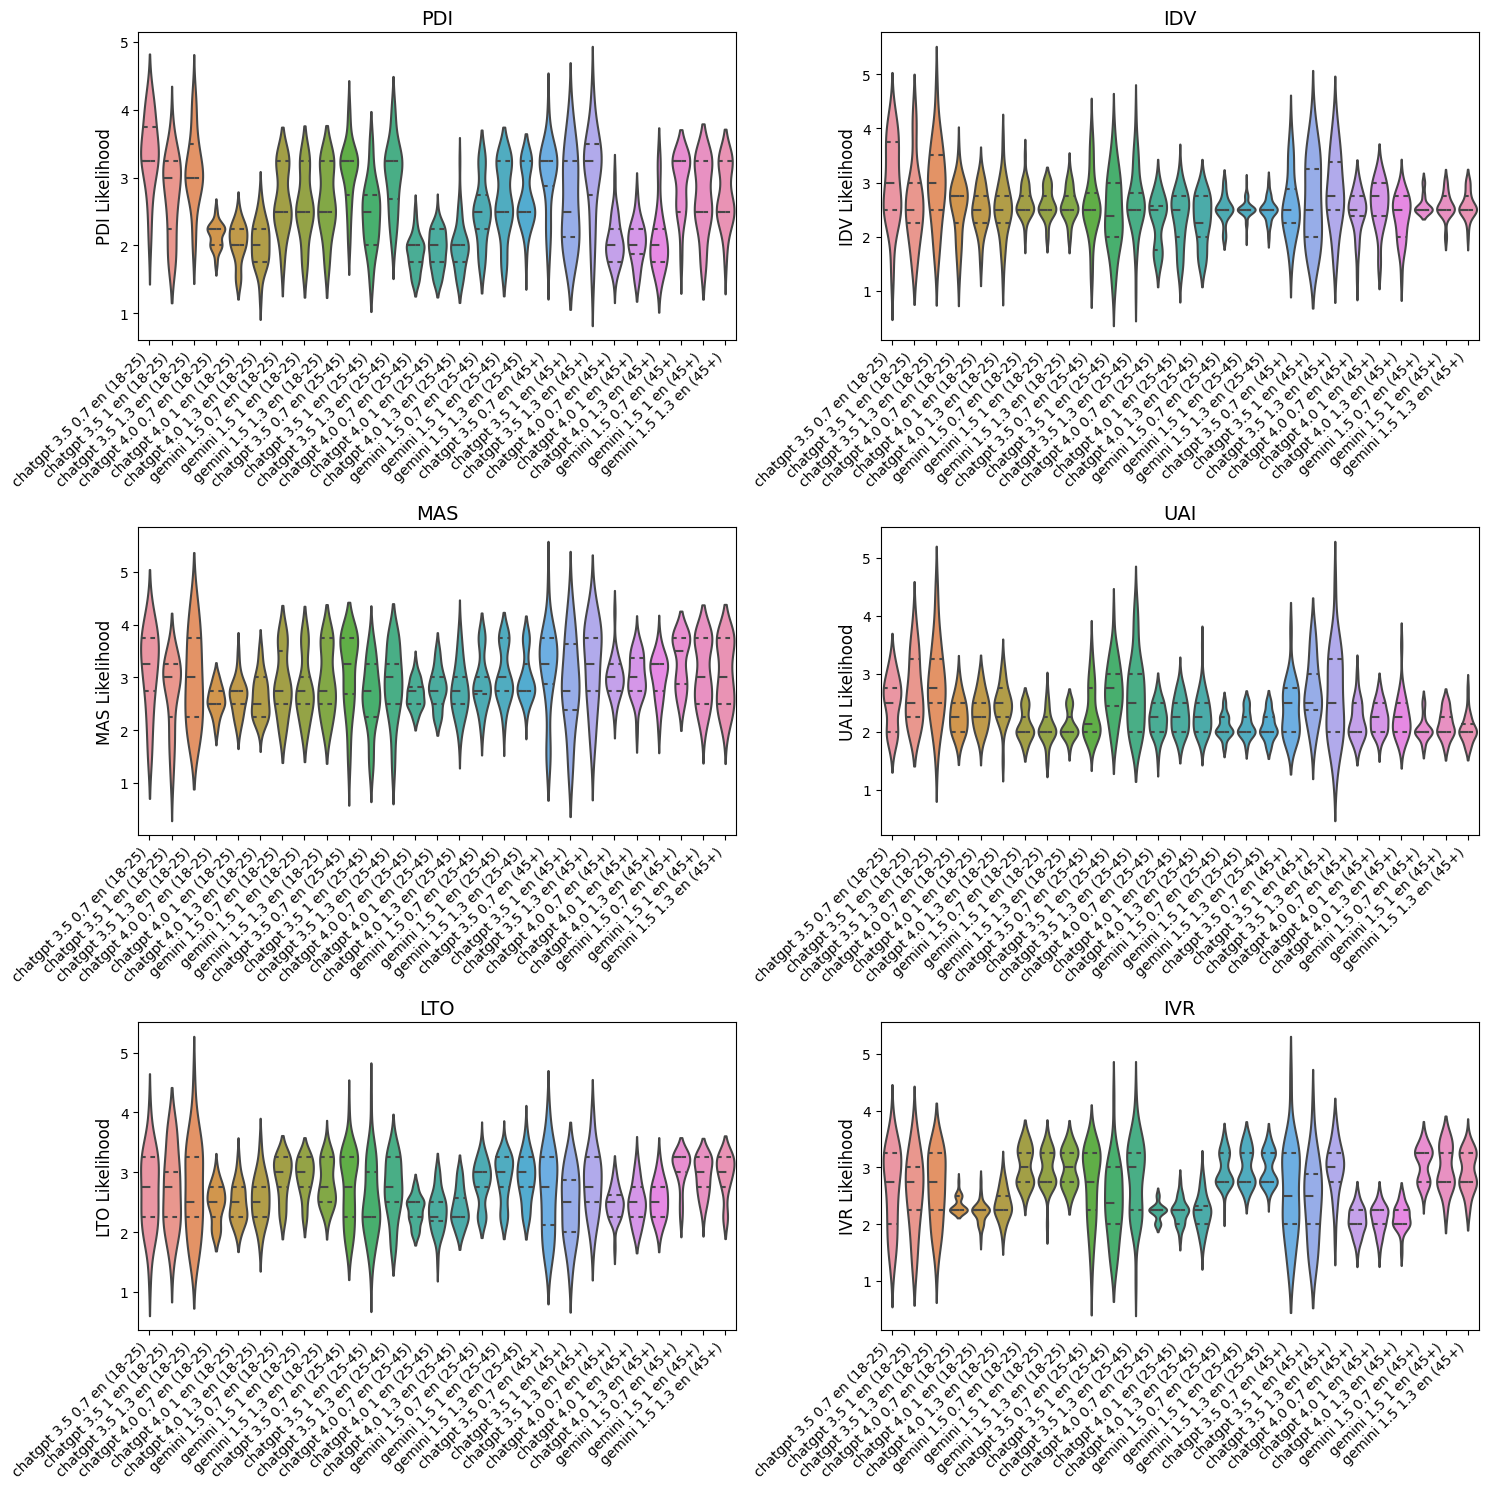

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

age_group_18_25 = candidate_data[(candidate_data['Age'] >= 18) & (candidate_data['Age'] <= 25)].index
age_group_25_45 = candidate_data[(candidate_data['Age'] > 25) & (candidate_data['Age'] <= 45)].index
age_group_45_plus = candidate_data[candidate_data['Age'] > 45].index

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')

            if language == 'en':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

data_18_25, labels_18_25 = process_age_group(age_group_18_25, "18-25")
data_25_45, labels_25_45 = process_age_group(age_group_25_45, "25-45")
data_45_plus, labels_45_plus = process_age_group(age_group_45_plus, "45+")

dimension_data = {dim: data_18_25[dim] + data_25_45[dim] + data_45_plus[dim] for dim in dimension_data}
file_labels = labels_18_25 + labels_25_45 + labels_45_plus

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Age Groups for Chinese Data (8-25, 25-45, 45+)

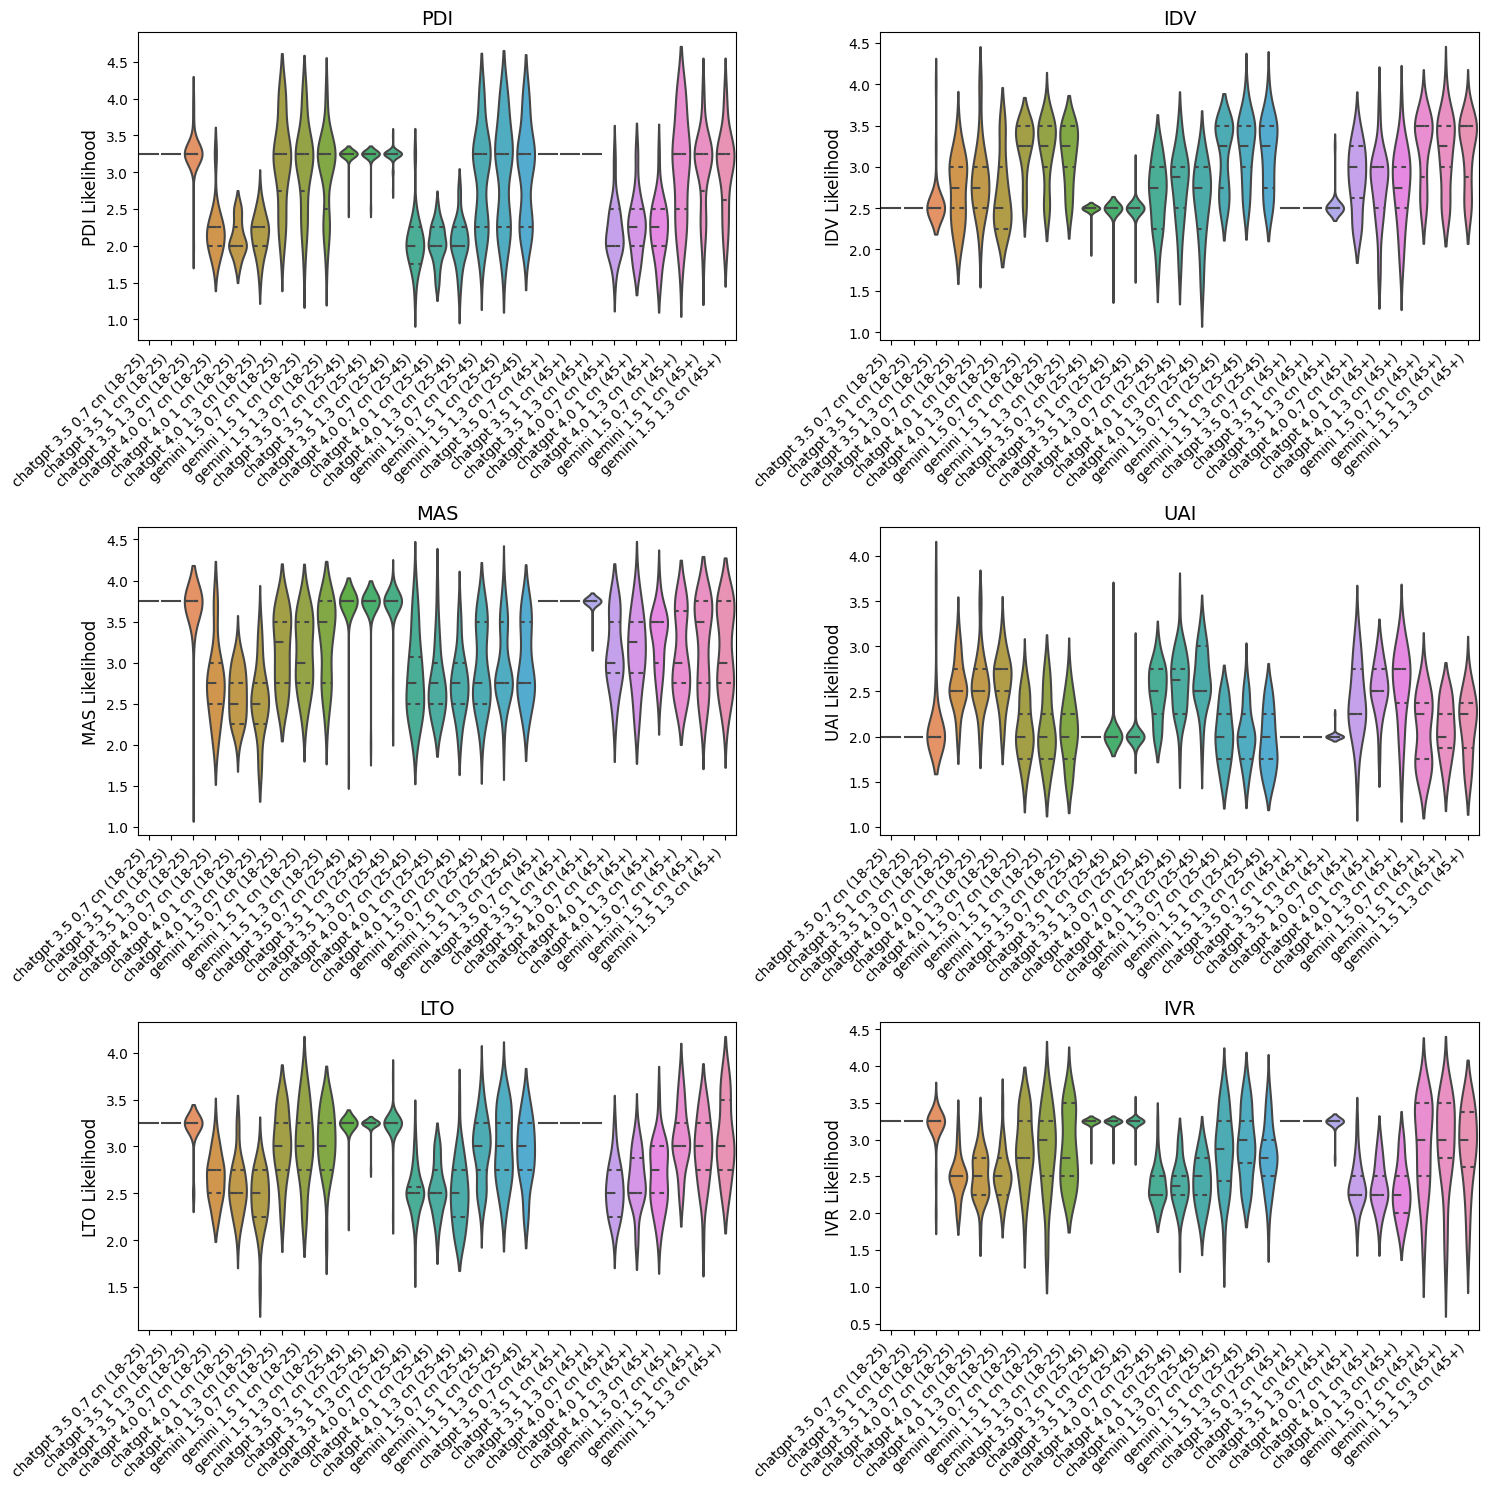

In [49]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

age_group_18_25 = candidate_data[(candidate_data['Age'] >= 18) & (candidate_data['Age'] <= 25)].index
age_group_25_45 = candidate_data[(candidate_data['Age'] > 25) & (candidate_data['Age'] <= 45)].index
age_group_45_plus = candidate_data[candidate_data['Age'] > 45].index

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')

            if language == 'cn':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_age_group(age_indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = age_indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_18_25, labels_18_25 = process_age_group(age_group_18_25, "18-25")
data_25_45, labels_25_45 = process_age_group(age_group_25_45, "25-45")
data_45_plus, labels_45_plus = process_age_group(age_group_45_plus, "45+")

dimension_data = {dim: data_18_25[dim] + data_25_45[dim] + data_45_plus[dim] for dim in dimension_data}
file_labels = labels_18_25 + labels_25_45 + labels_45_plus

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Different Martial Status Data

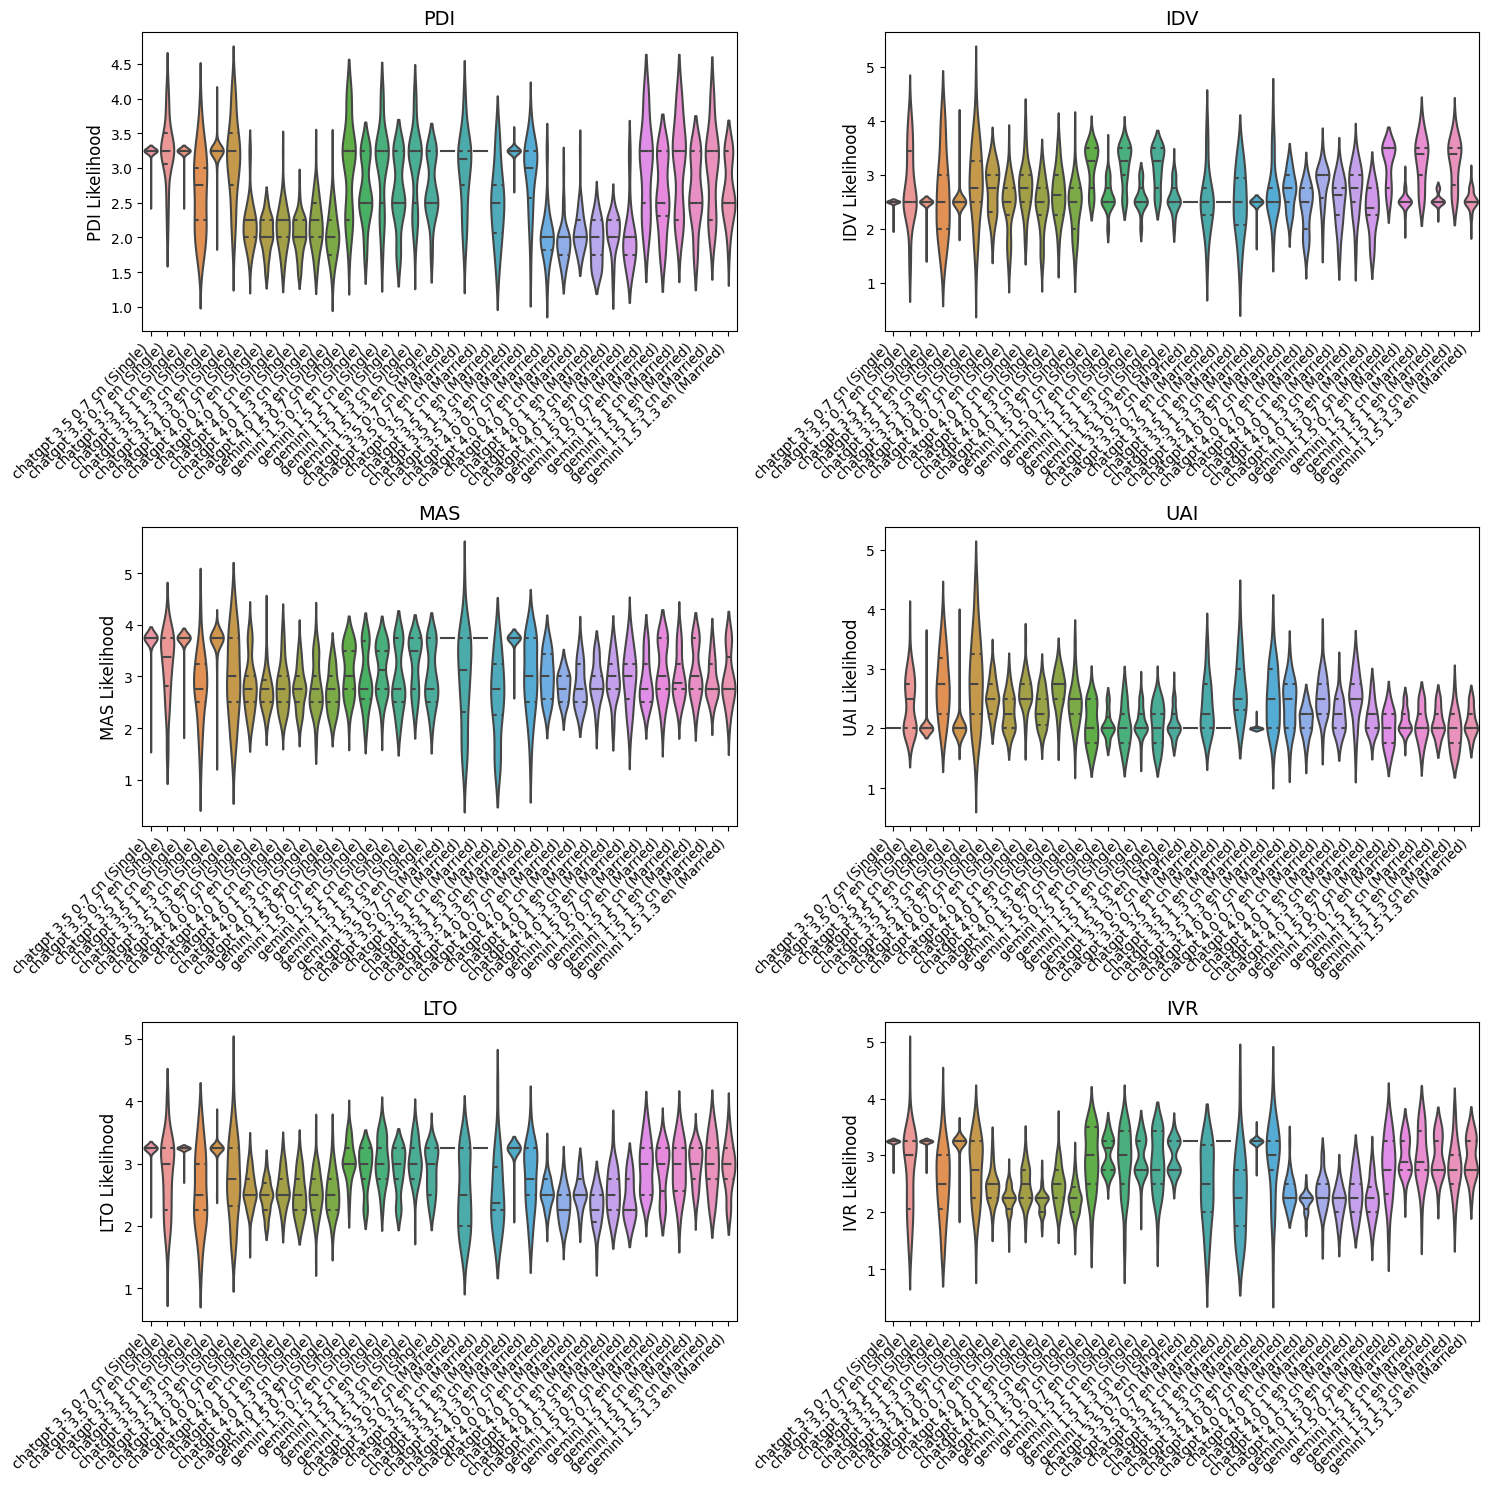

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

single_indexes = candidate_data[candidate_data['Marital Status'] == 'Single'].index
married_indexes = candidate_data[candidate_data['Marital Status'] == 'Married'].index

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_marital_status_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_single, labels_single = process_marital_status_group(single_indexes, "Single")
data_married, labels_married = process_marital_status_group(married_indexes, "Married")

dimension_data = {
    dim: data_single[dim] + data_married[dim]
    for dim in dimension_data
}
file_labels = labels_single + labels_married

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### USA and Canada Data

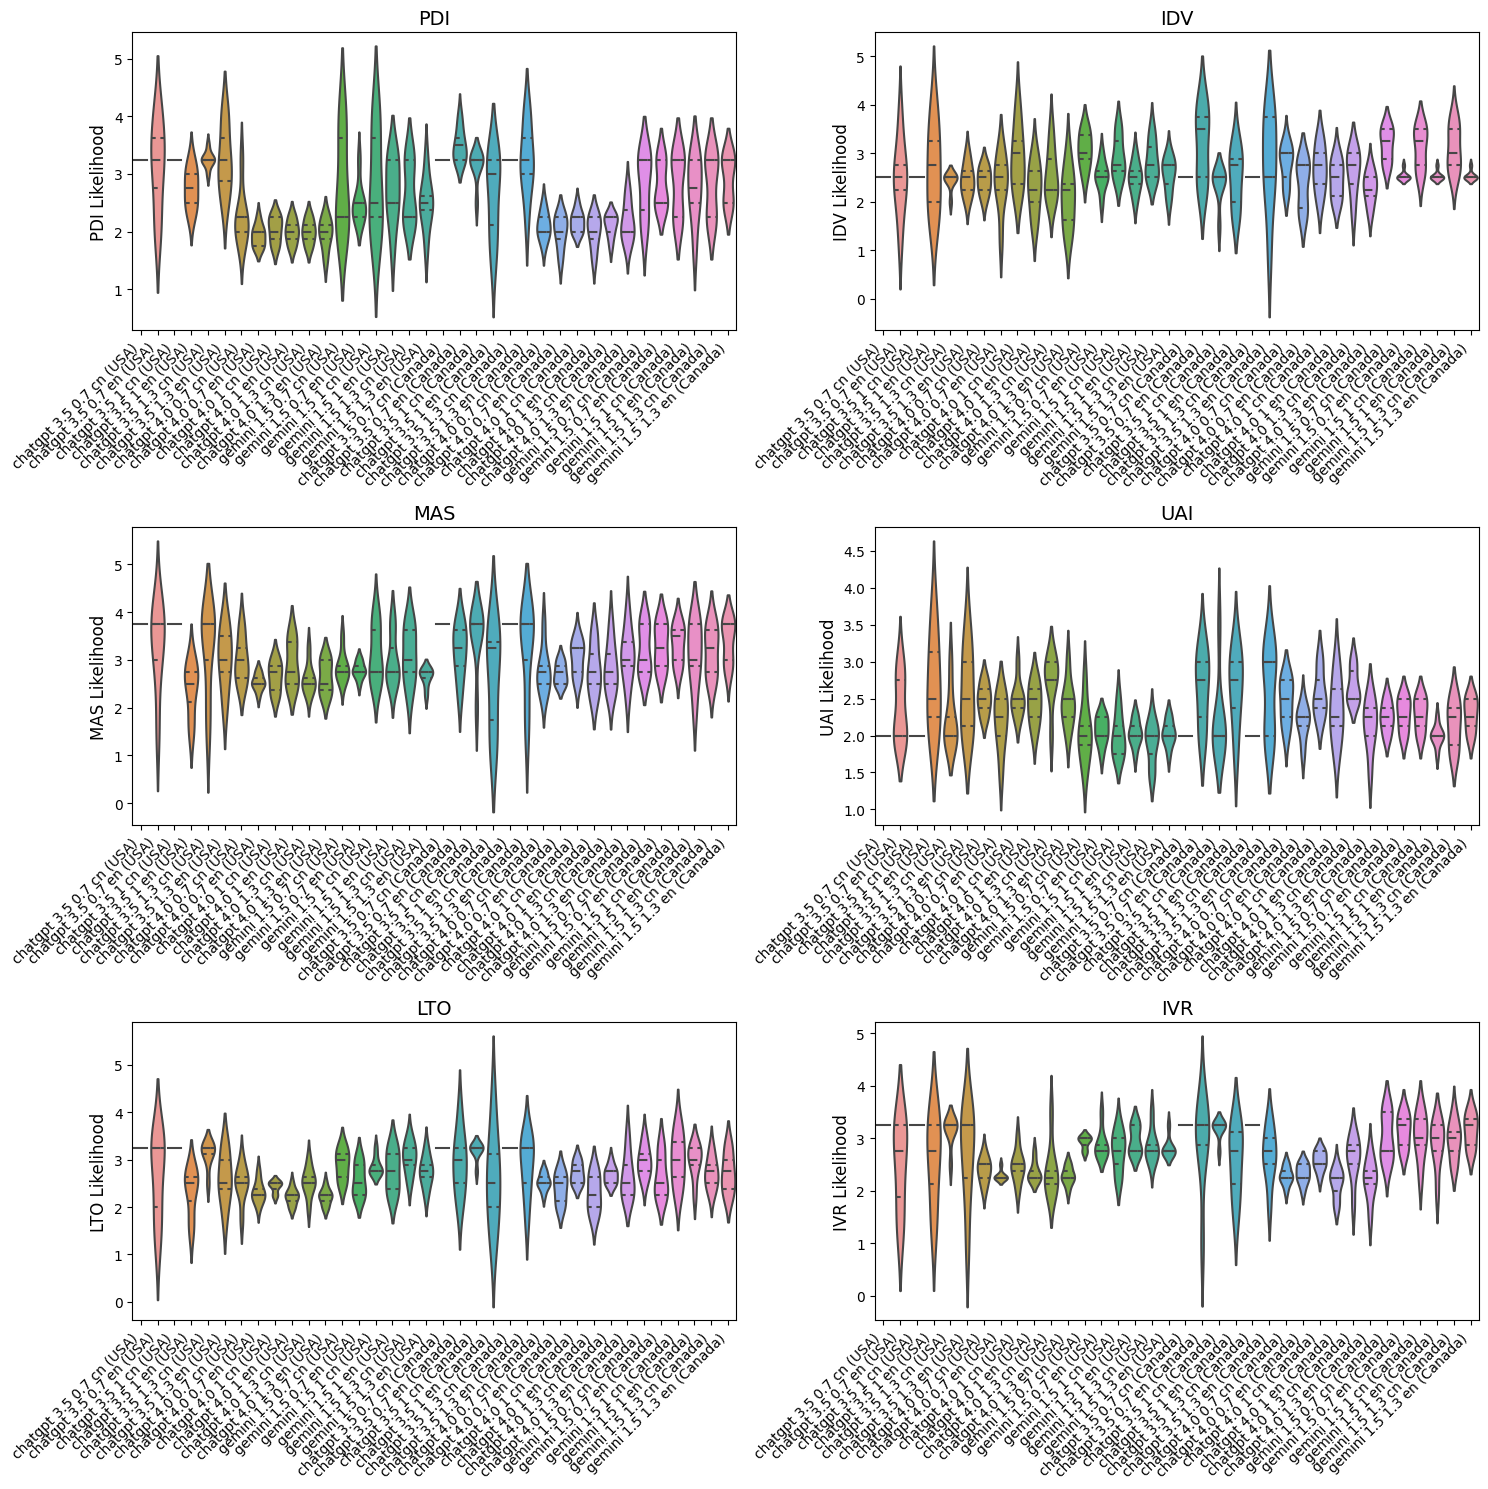

In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

usa_indexes = candidate_data[candidate_data['Country'] == 'USA'].index
canada_indexes = candidate_data[candidate_data['Country'] == 'Canada'].index

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_country_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_usa, labels_usa = process_country_group(usa_indexes, "USA")
data_canada, labels_canada = process_country_group(canada_indexes, "Canada")

dimension_data = {
    dim: data_usa[dim] + data_canada[dim]
    for dim in dimension_data
}
file_labels = labels_usa + labels_canada

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Data based on Sex

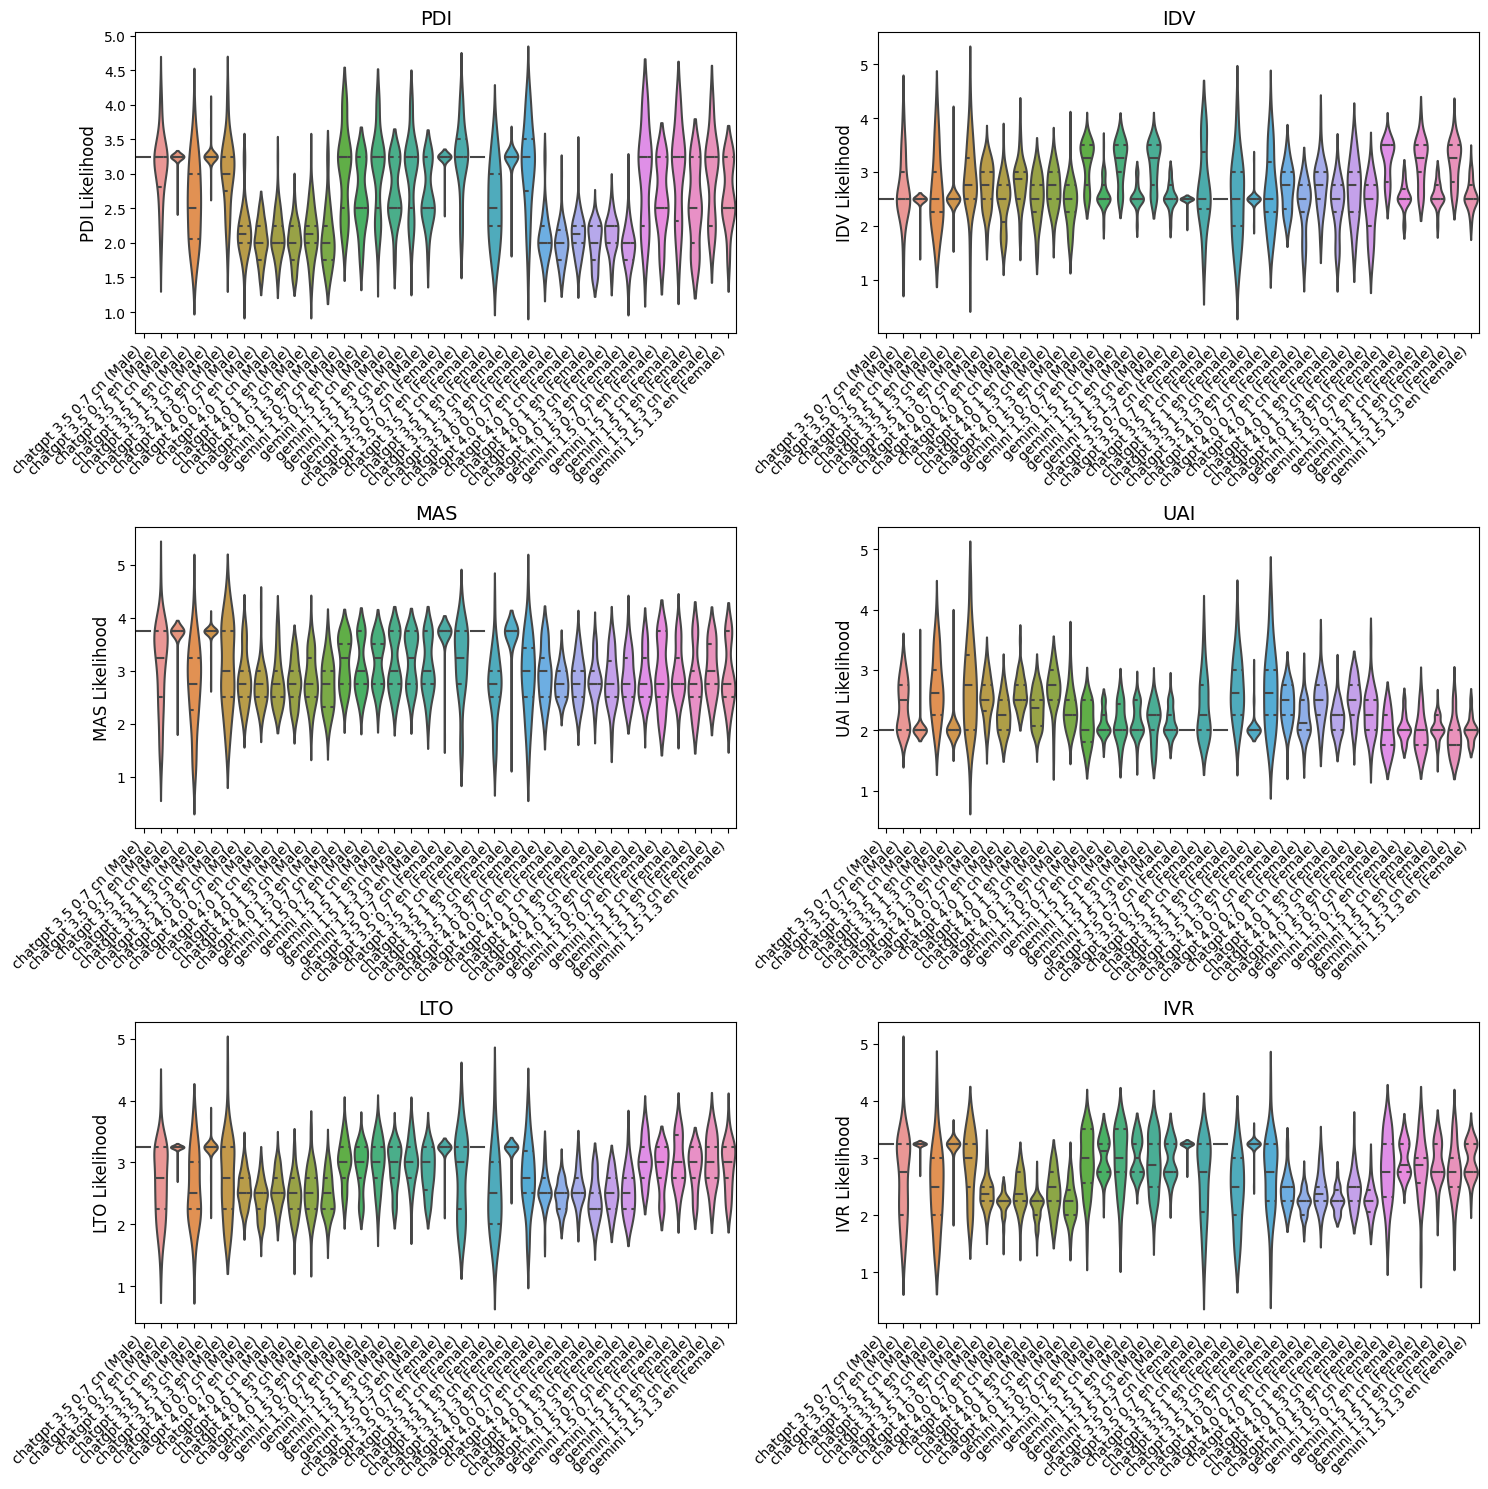

In [52]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

male_indexes = candidate_data[candidate_data['Sex'] == 'Male'].index
female_indexes = candidate_data[candidate_data['Sex'] == 'Female'].index

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_sex_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_male, labels_male = process_sex_group(male_indexes, "Male")
data_female, labels_female = process_sex_group(female_indexes, "Female")

dimension_data = {
    dim: data_male[dim] + data_female[dim]
    for dim in dimension_data
}
file_labels = labels_male + labels_female

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Data Based on Education Level (English)

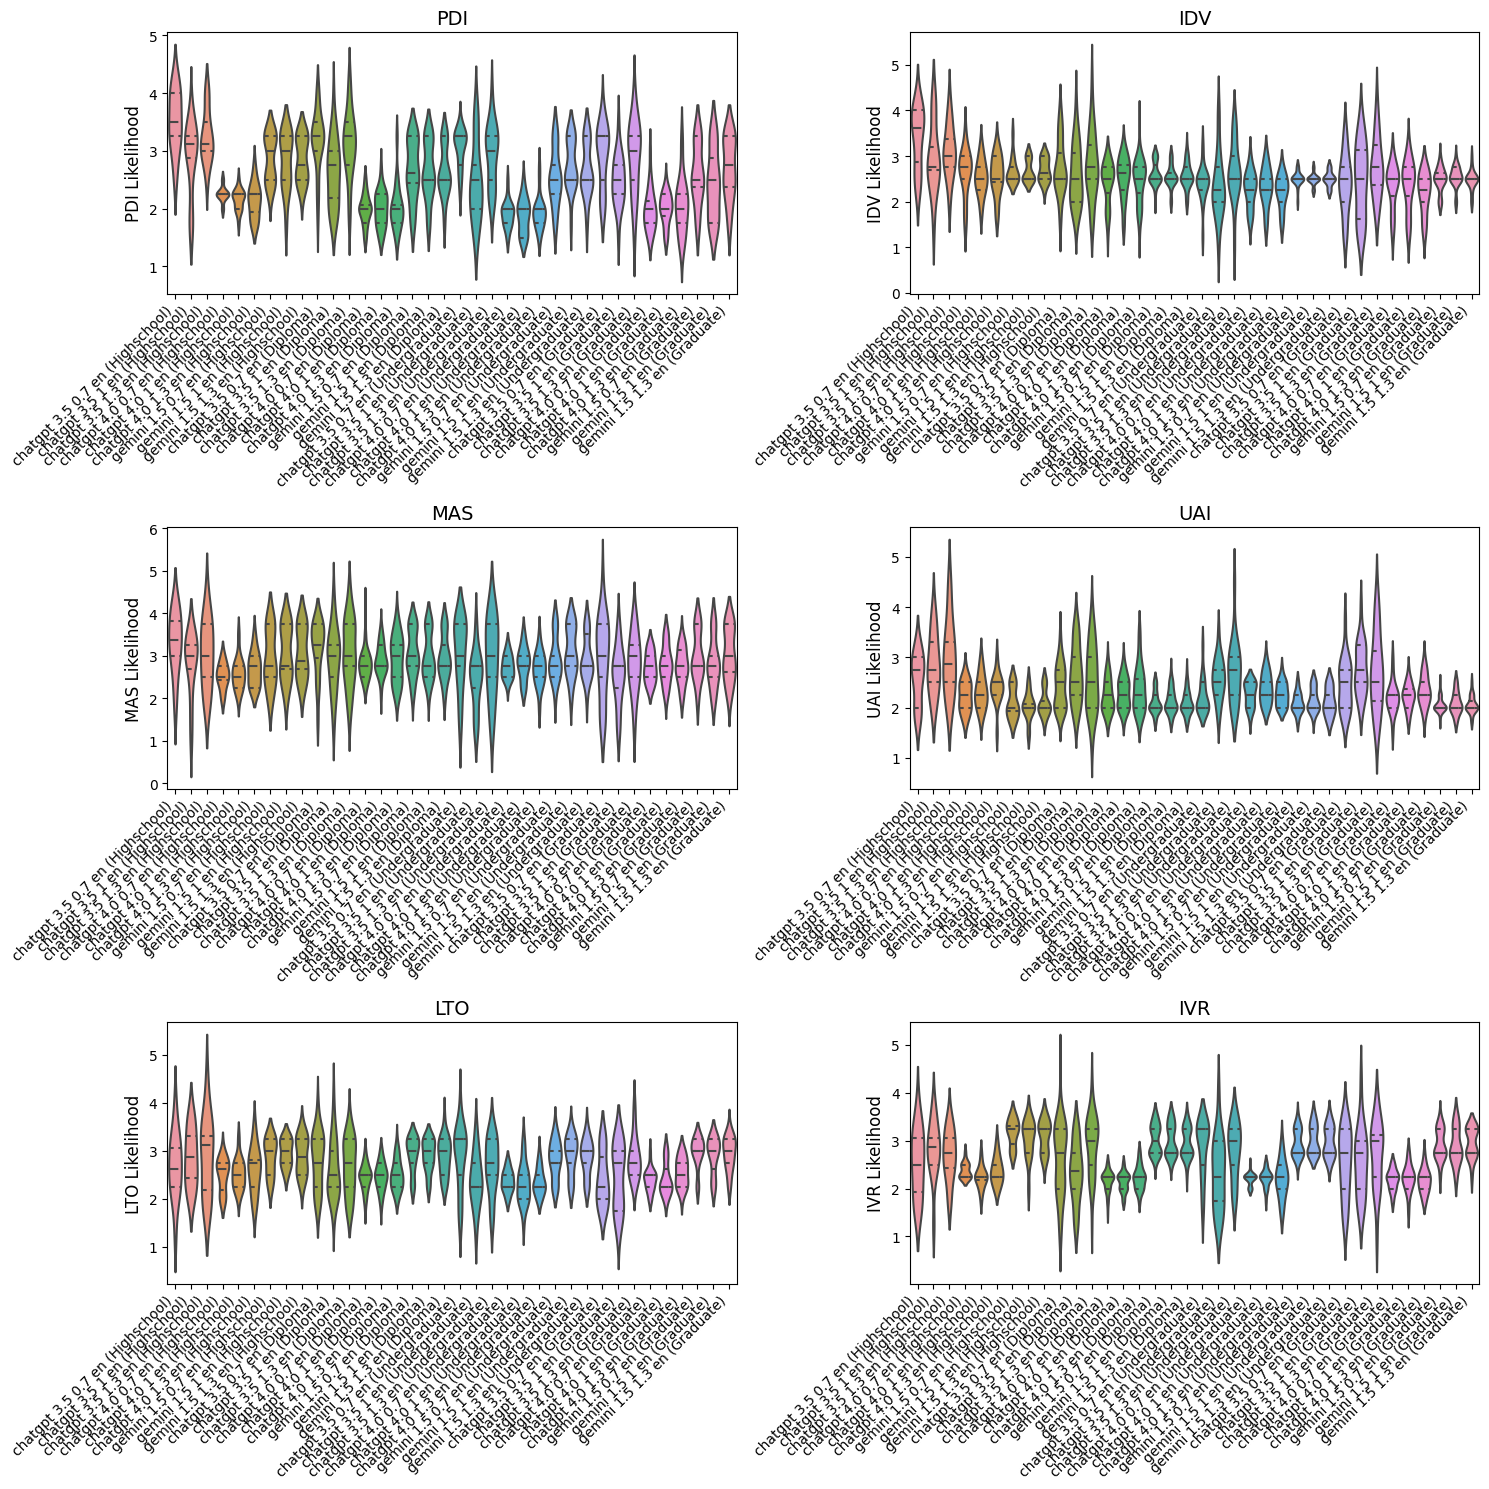

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

education_levels = ['Highschool', 'Diploma', 'Undergraduate', 'Graduate']
education_indexes = {level: candidate_data[candidate_data['Education'] == level].index for level in education_levels}

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            if language=='en':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_education_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_education = {}
labels_education = {}

for level in education_levels:
    data, labels = process_education_group(education_indexes[level], level)
    data_education[level] = data
    labels_education[level] = labels

dimension_data = {dim: [] for dim in dimension_data}
file_labels = []

for level in education_levels:
    for dim in dimension_data:
        dimension_data[dim].extend(data_education[level][dim])
    file_labels.extend(labels_education[level])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Data Based on Education Level (Chinese)

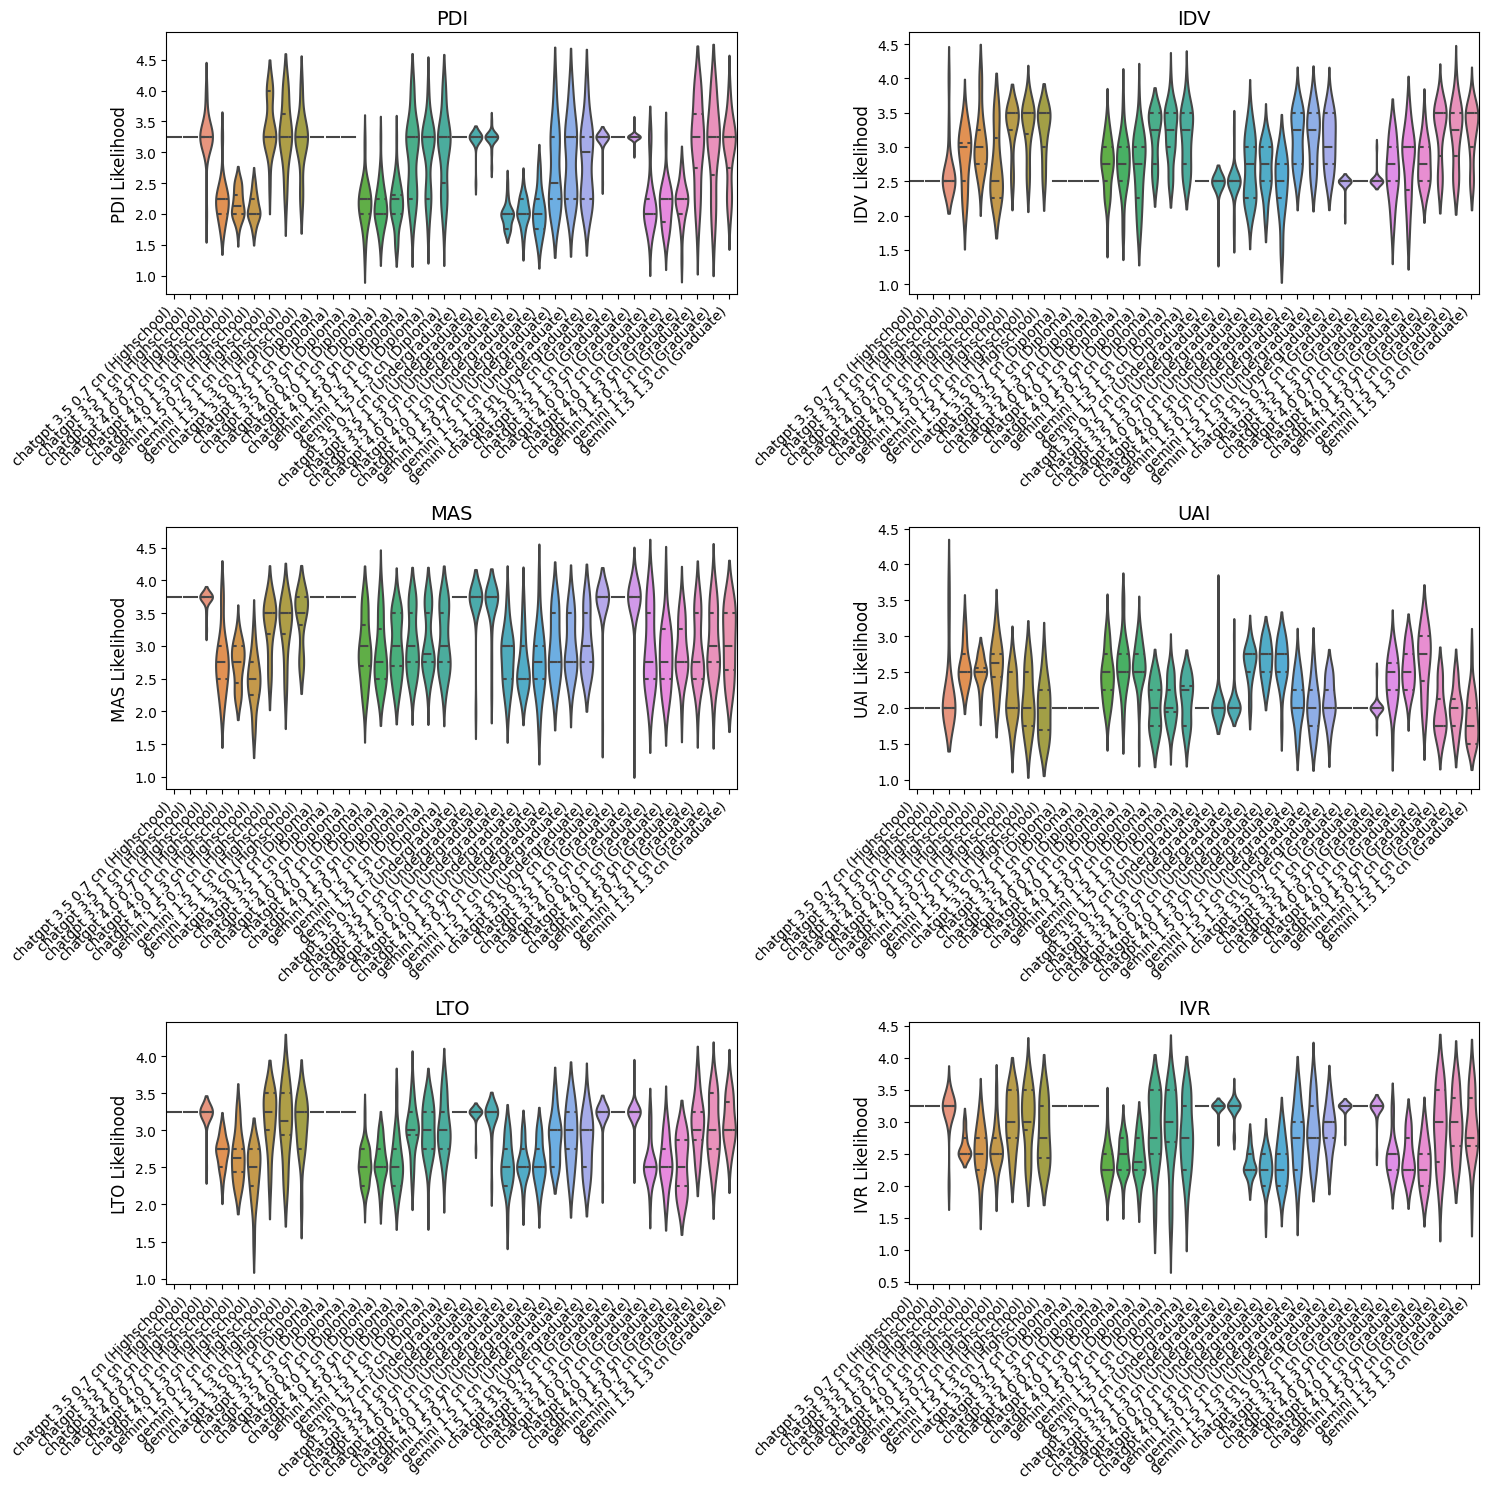

In [54]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

education_levels = ['Highschool', 'Diploma', 'Undergraduate', 'Graduate']
education_indexes = {level: candidate_data[candidate_data['Education'] == level].index for level in education_levels}

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            if language=='cn':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_education_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_education = {}
labels_education = {}

for level in education_levels:
    data, labels = process_education_group(education_indexes[level], level)
    data_education[level] = data
    labels_education[level] = labels

dimension_data = {dim: [] for dim in dimension_data}
file_labels = []

for level in education_levels:
    for dim in dimension_data:
        dimension_data[dim].extend(data_education[level][dim])
    file_labels.extend(labels_education[level])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Based on Social Class (English)

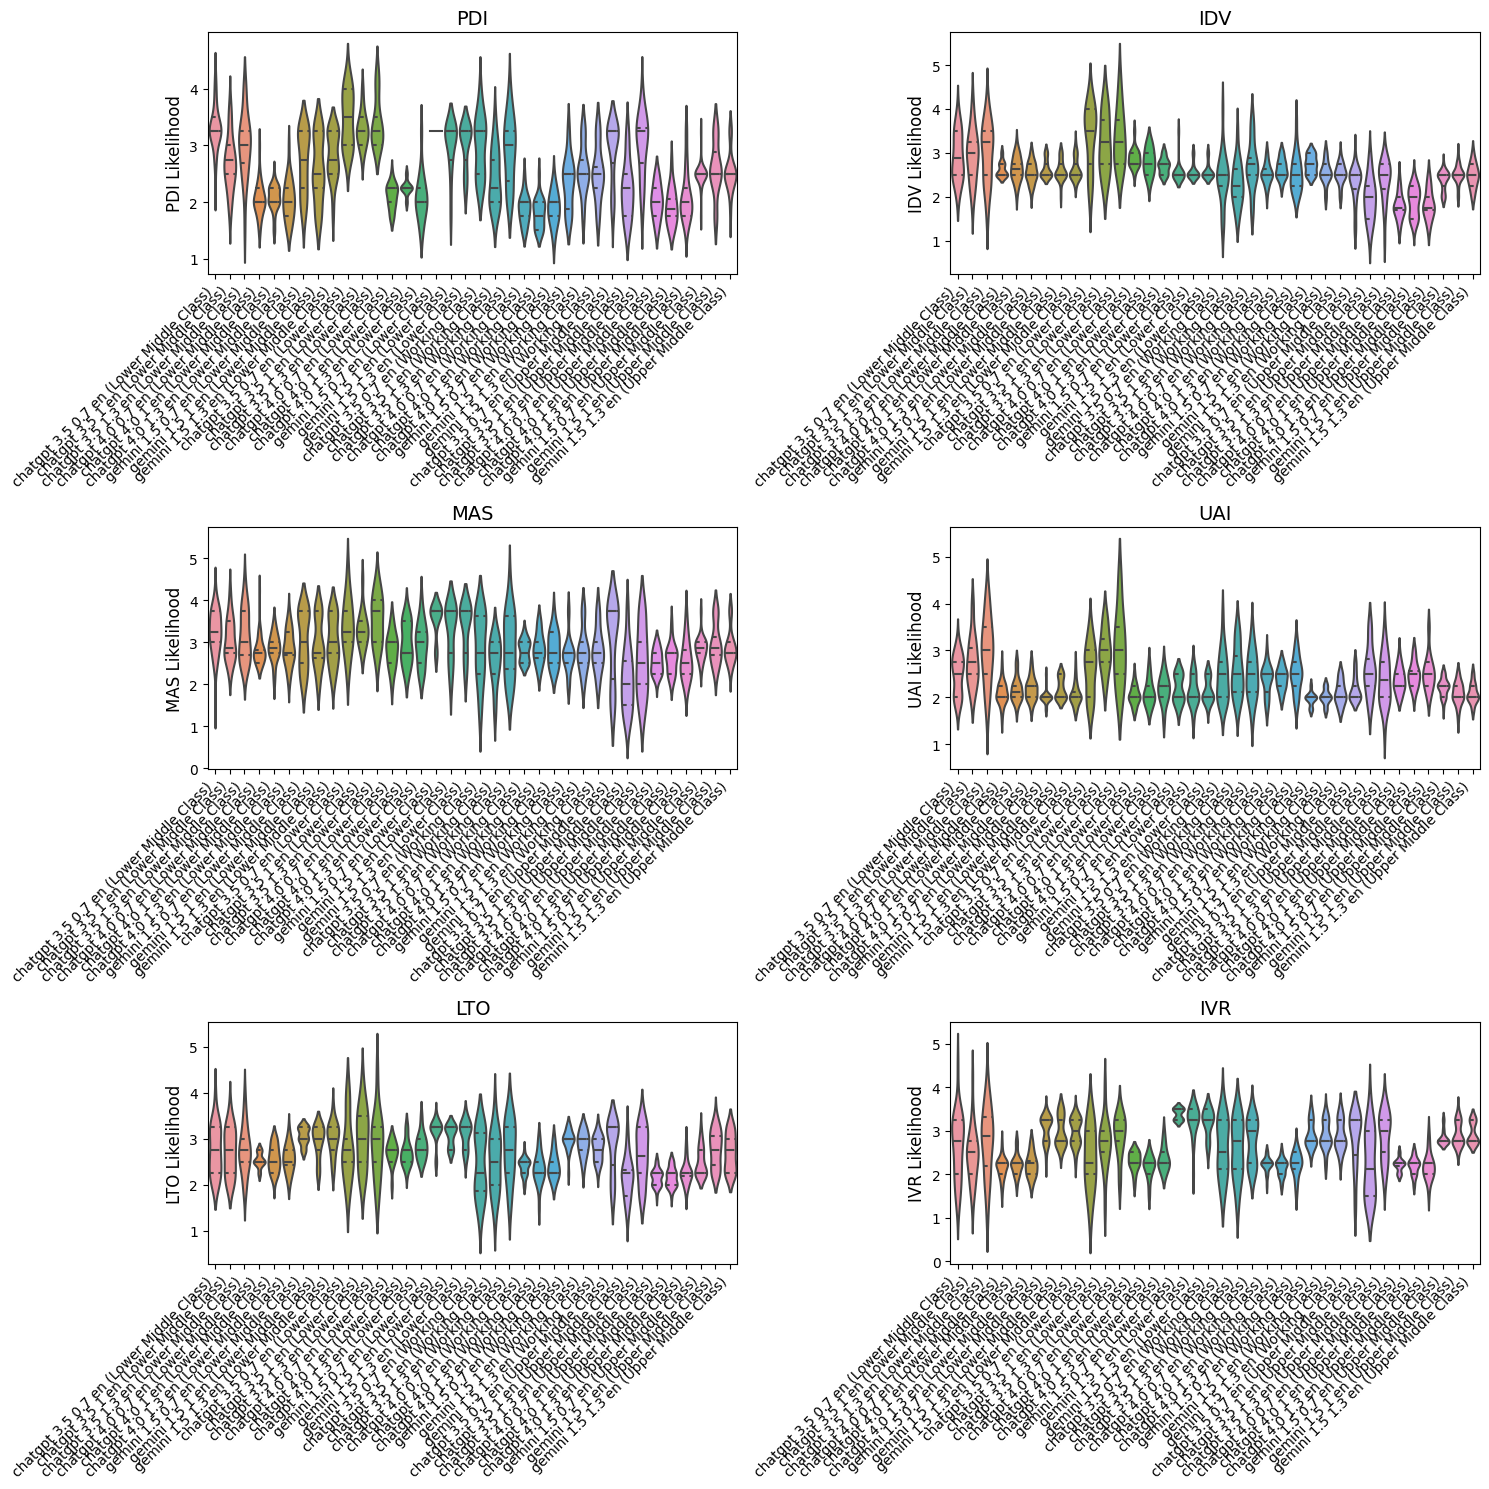

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

social_classes = ["Lower Middle Class", "Lower Class", "Working Class", "Upper Middle Class"]
social_class_indexes = {cls: candidate_data[candidate_data['Social Class'] == cls].index for cls in social_classes}

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            if language=='en':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_social_class_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_social_class = {}
labels_social_class = {}

for cls in social_classes:
    data, labels = process_social_class_group(social_class_indexes[cls], cls)
    data_social_class[cls] = data
    labels_social_class[cls] = labels

dimension_data = {dim: [] for dim in dimension_data}
file_labels = []

for cls in social_classes:
    for dim in dimension_data:
        dimension_data[dim].extend(data_social_class[cls][dim])
    file_labels.extend(labels_social_class[cls])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()


### Based on Social Class (Chinese)

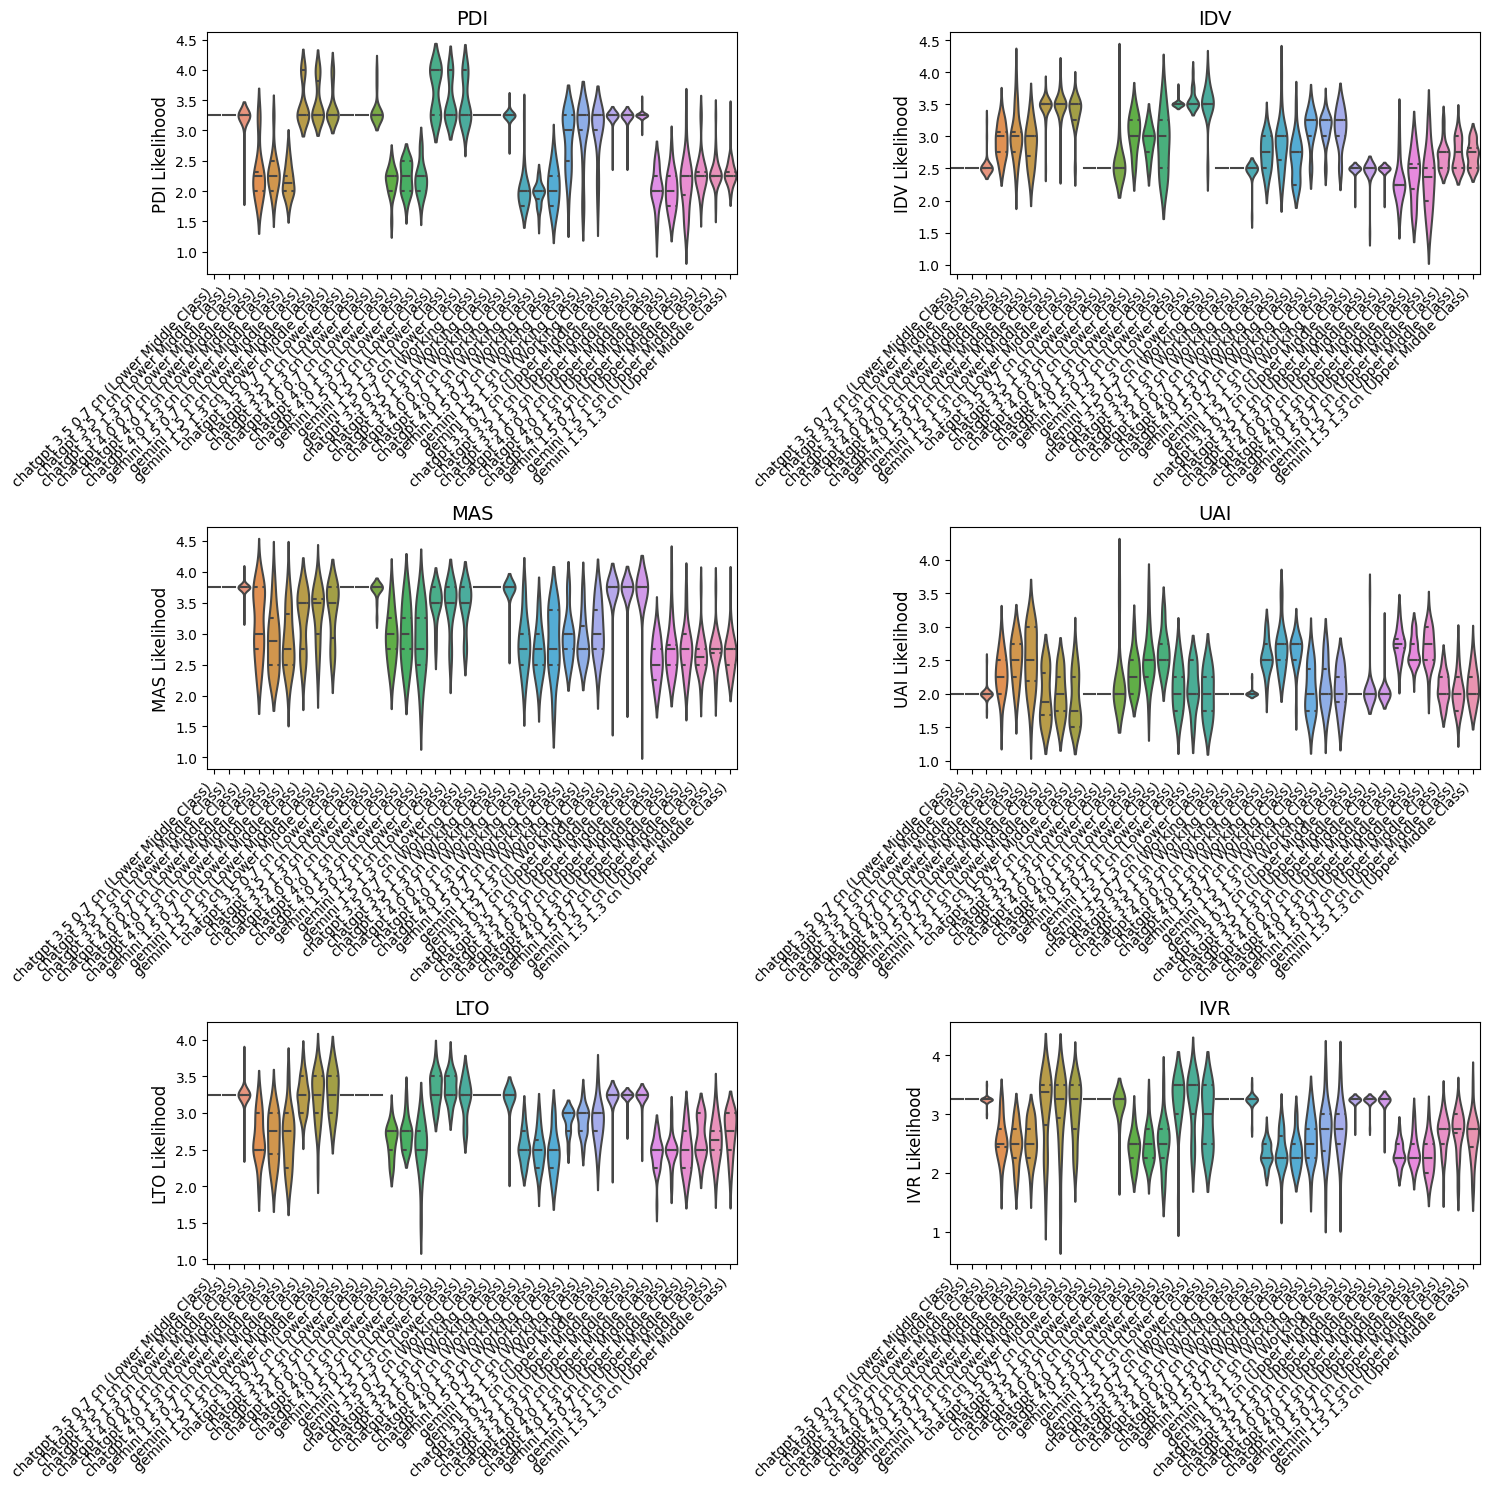

In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

directory = 'csv'

candidate_file = 'candidate_data_english.csv'
candidate_data = pd.read_csv(candidate_file)

social_classes = ["Lower Middle Class", "Lower Class", "Working Class", "Upper Middle Class"]
social_class_indexes = {cls: candidate_data[candidate_data['Social Class'] == cls].index for cls in social_classes}

dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
file_labels = []

file_metadata = []

for file_name in os.listdir(directory):
    if file_name.endswith('.csv') or file_name.endswith('.json'):
        parts = file_name.split('_')
        if len(parts) >= 5:
            model_name = parts[1]
            version = parts[2]
            temperature = parts[3]
            language = parts[4].replace('.csv', '').replace('.json', '')
            if language=='cn':
                file_metadata.append((model_name, version, temperature, language, file_name))

file_metadata.sort(key=lambda x: (x[0], x[1], x[2], x[3]))

def process_social_class_group(indexes, group_label):
    group_dimension_data = {'PDI': [], 'IDV': [], 'MAS': [], 'UAI': [], 'LTO': [], 'IVR': []}
    group_labels = []
    for model_name, version, temperature, language, file_name in file_metadata:
        label = f"{model_name} {version} {temperature} {language} ({group_label})"
        file_path = os.path.join(directory, file_name)
        if file_name.endswith('.csv'):
            data = pd.read_csv(file_path)
        elif file_name.endswith('.json'):
            with open(file_path, 'r') as f:
                json_data = json.load(f)
            data = pd.DataFrame([list(map(int, v.split(','))) for v in json_data.values()],
                                columns=[f"Q{i}" for i in range(1, 25)])
        valid_indexes = indexes.intersection(data.index)
        filtered_data = data.loc[valid_indexes]
        filtered_data = filtered_data.copy()
        filtered_data['PDI'] = filtered_data[['1', '2', '3', '4']].mean(axis=1)
        filtered_data['IDV'] = filtered_data[['5', '6', '7', '8']].mean(axis=1)
        filtered_data['MAS'] = filtered_data[['9', '10', '11', '12']].mean(axis=1)
        filtered_data['UAI'] = filtered_data[['13', '14', '15', '16']].mean(axis=1)
        filtered_data['LTO'] = filtered_data[['17', '18', '19', '20']].mean(axis=1)
        filtered_data['IVR'] = filtered_data[['21', '22', '23', '24']].mean(axis=1)
        for dim in group_dimension_data:
            group_dimension_data[dim].append(filtered_data[dim])
        group_labels.append(label)
    return group_dimension_data, group_labels

data_social_class = {}
labels_social_class = {}

for cls in social_classes:
    data, labels = process_social_class_group(social_class_indexes[cls], cls)
    data_social_class[cls] = data
    labels_social_class[cls] = labels

dimension_data = {dim: [] for dim in dimension_data}
file_labels = []

for cls in social_classes:
    for dim in dimension_data:
        dimension_data[dim].extend(data_social_class[cls][dim])
    file_labels.extend(labels_social_class[cls])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, dim in enumerate(dimension_data):
    ax = axes[i]
    sns.violinplot(data=dimension_data[dim], ax=ax, inner="quartile", scale="width")
    ax.set_title(dim, fontsize=14)
    ax.set_xticks(range(len(file_labels)))
    ax.set_xticklabels(file_labels, rotation=45, ha='right', fontsize=10)
    ax.set_ylabel(f"{dim} Likelihood", fontsize=12)

plt.tight_layout()
plt.show()
